In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from collections import Counter

In [29]:
df_train = pd.read_csv("source/train.csv")
df_test = pd.read_csv("source/test.csv")

Number of subjects in train:  21
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


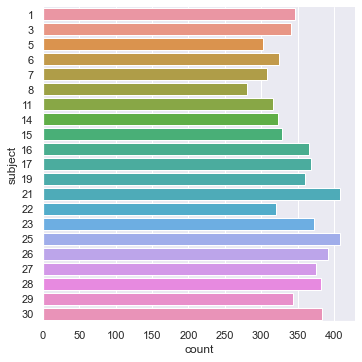

In [30]:
print("Number of subjects in train: ", len(df_train["subject"].unique()))
print(df_train["subject"].value_counts())
sb.catplot(y = "subject", data = df_train, kind = "count")
df_train.info()

Number of subjects in test:  9
24    381
18    364
20    354
13    327
12    320
4     317
2     302
10    294
9     288
Name: subject, dtype: int64


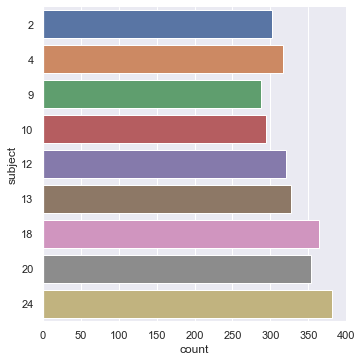

In [31]:
print("Number of subjects in test: ", len(df_test["subject"].unique()))
print(df_test["subject"].value_counts())
sb.catplot(y = "subject", data = df_test, kind = "count")

### Outliers Visualization


In [32]:
cols = df_train.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

<ipython-input-33-dd175428469a>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


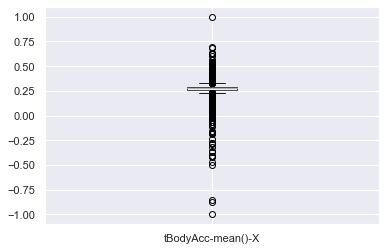

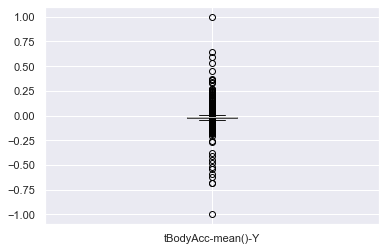

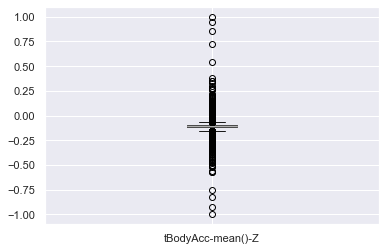

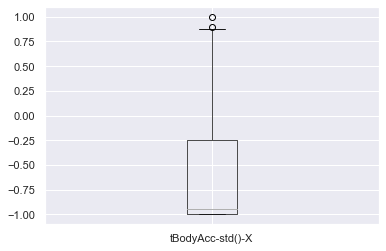

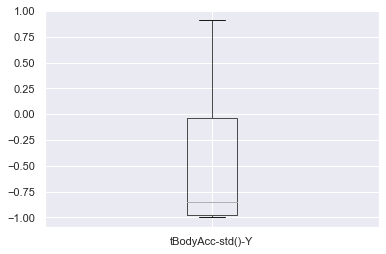

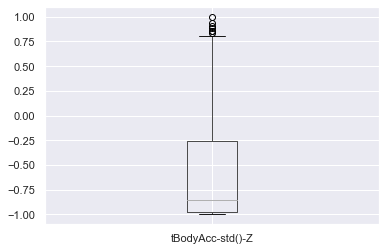

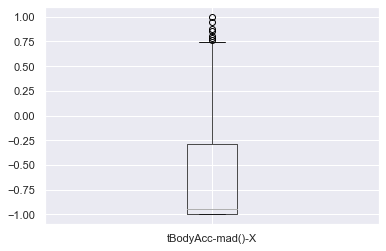

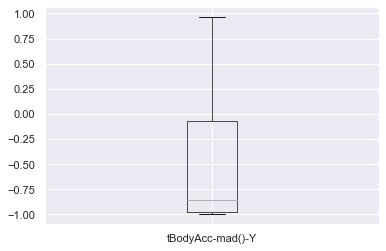

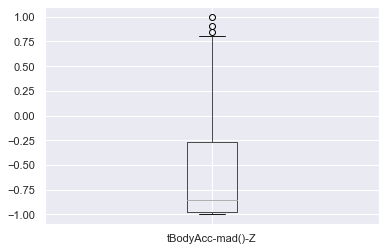

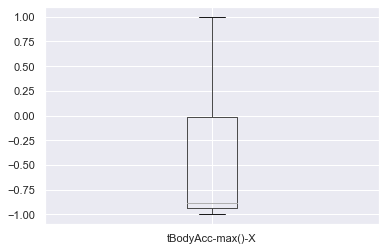

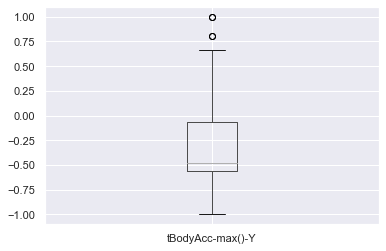

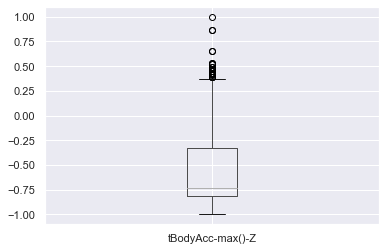

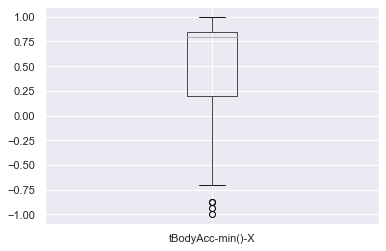

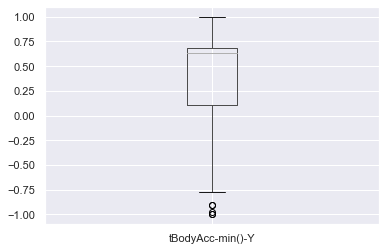

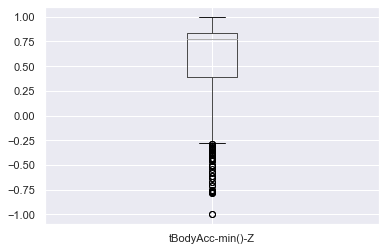

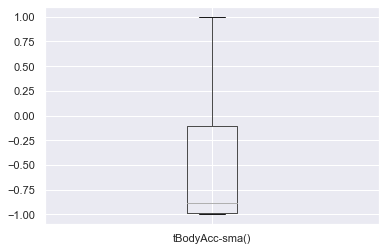

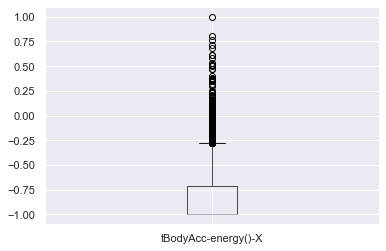

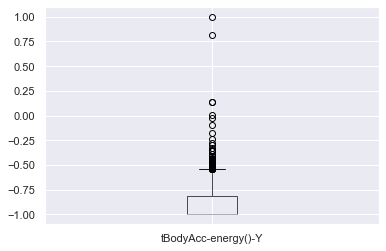

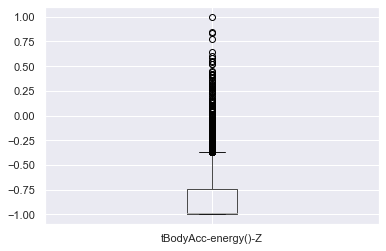

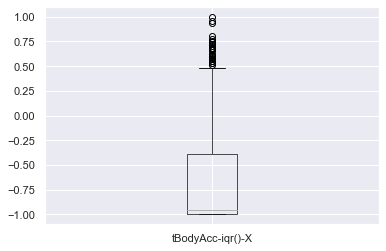

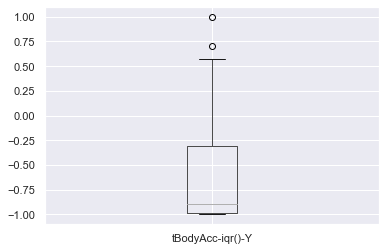

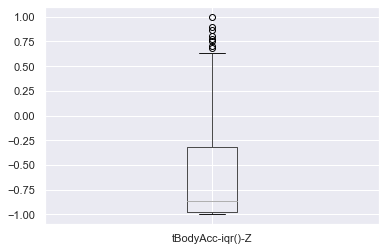

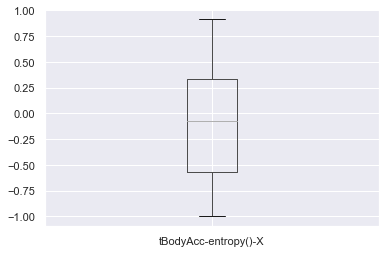

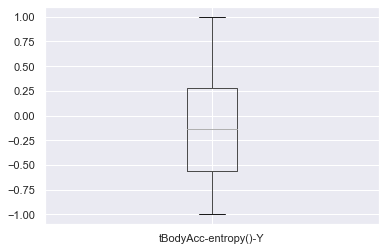

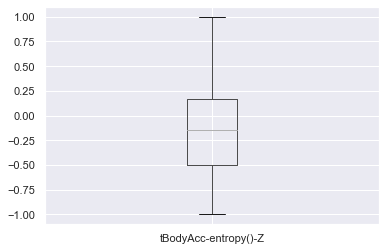

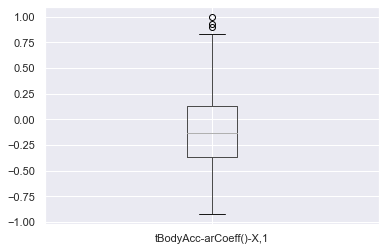

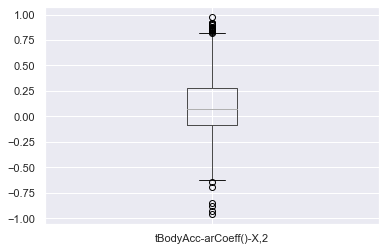

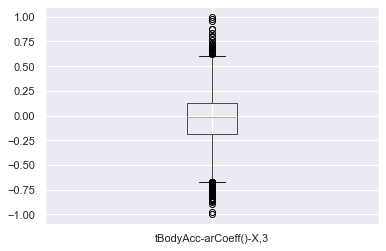

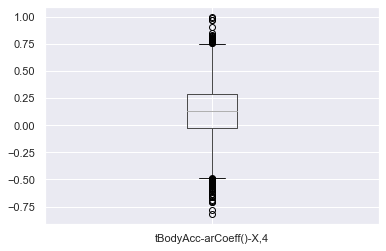

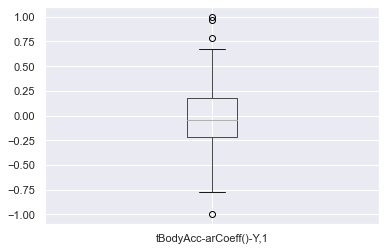

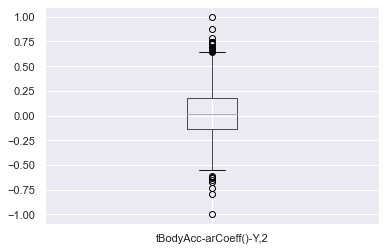

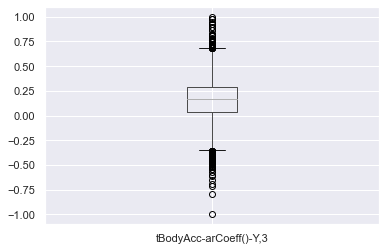

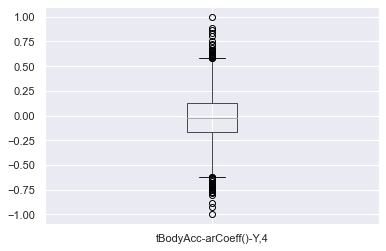

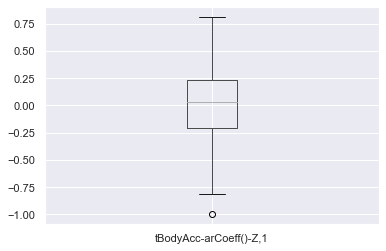

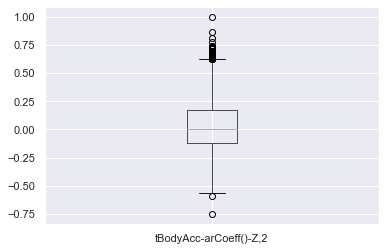

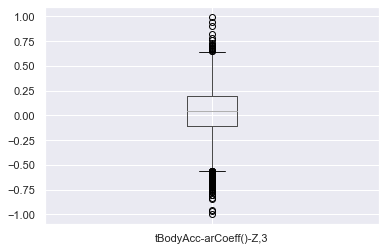

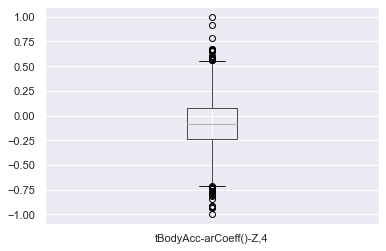

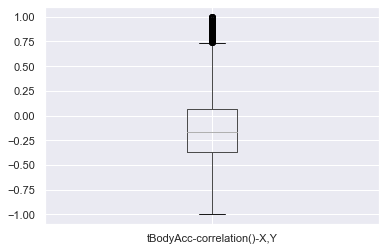

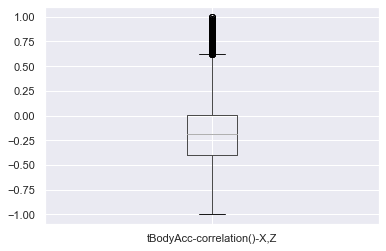

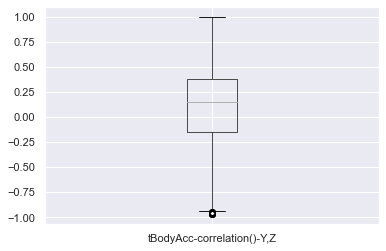

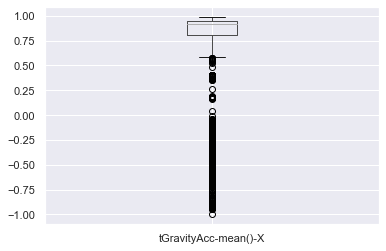

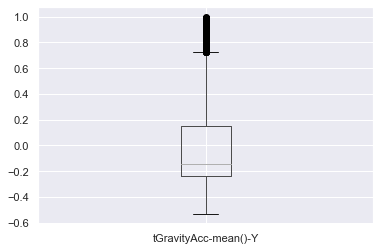

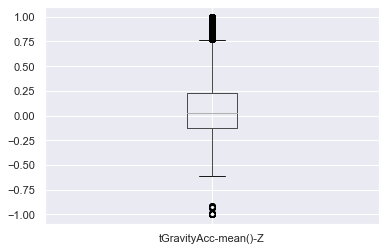

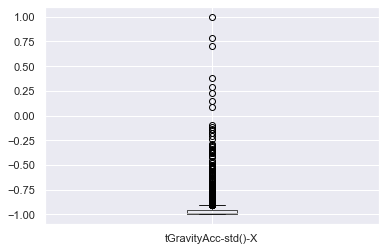

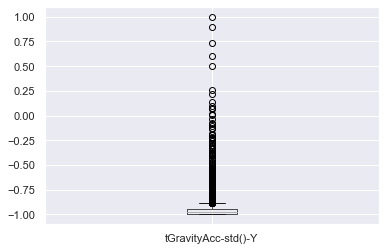

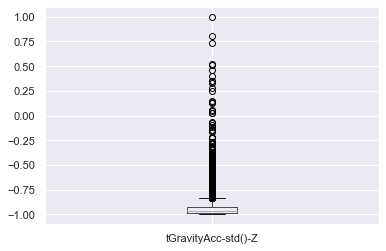

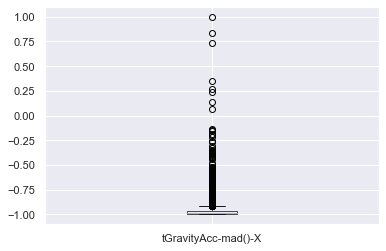

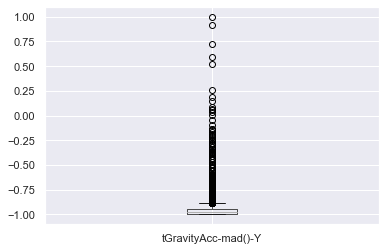

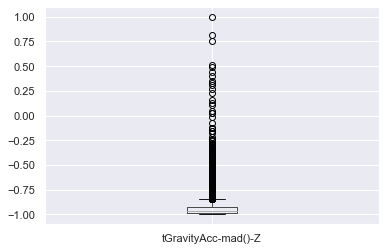

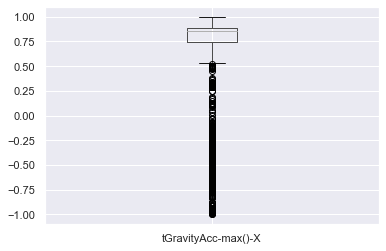

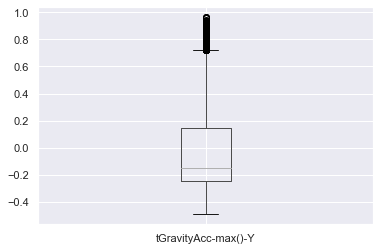

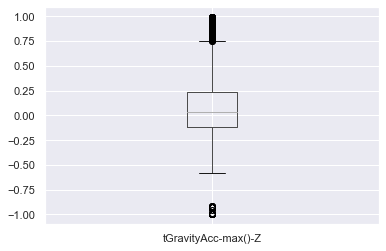

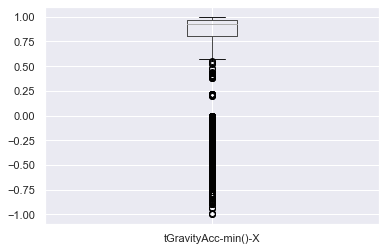

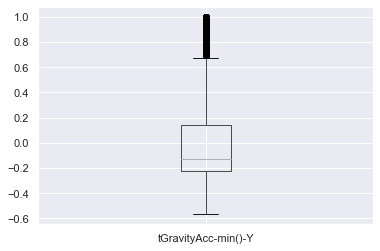

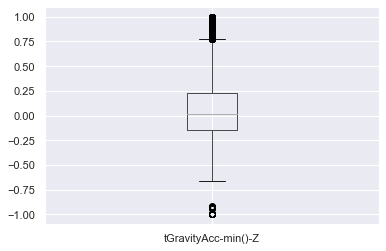

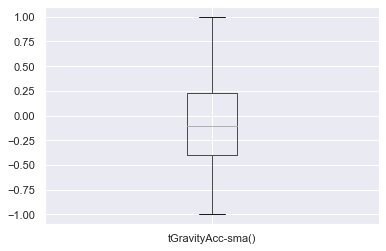

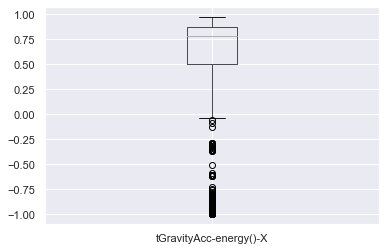

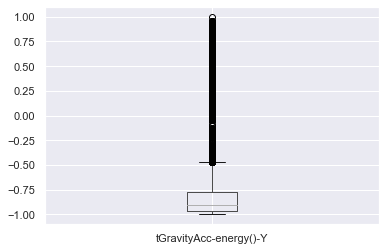

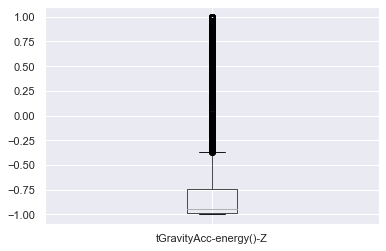

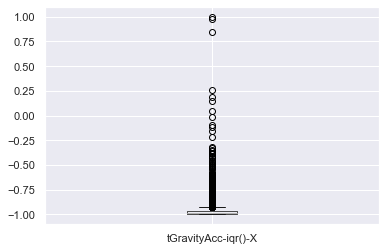

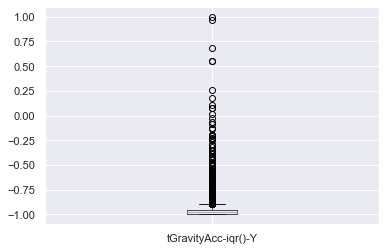

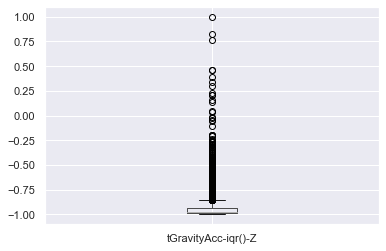

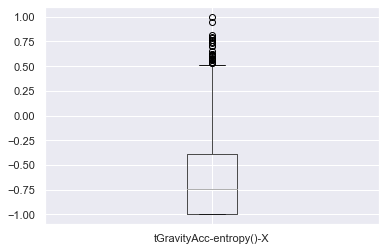

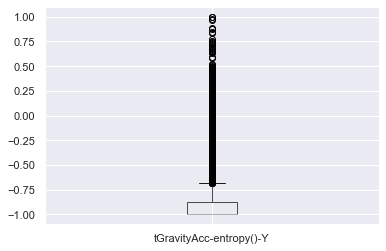

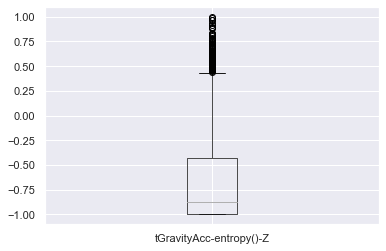

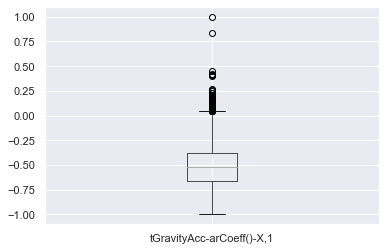

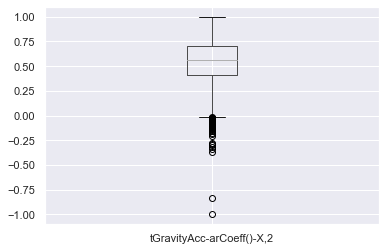

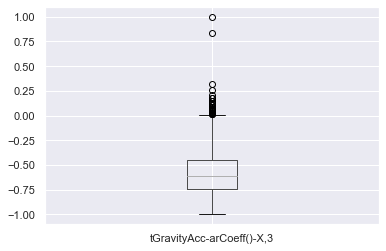

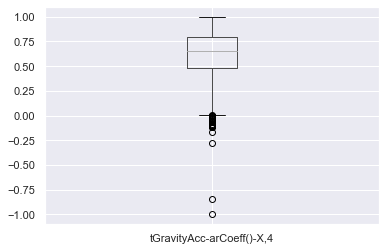

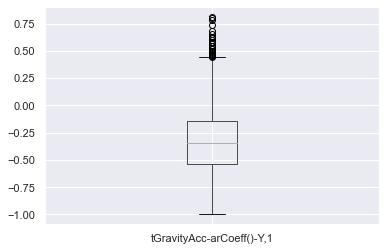

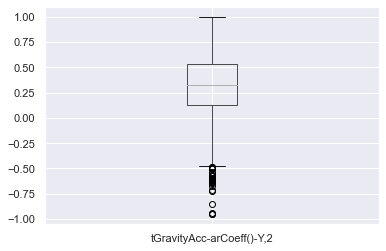

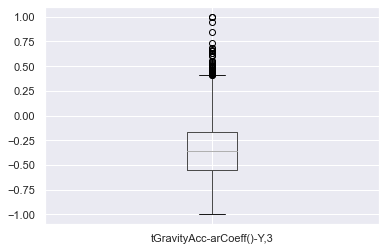

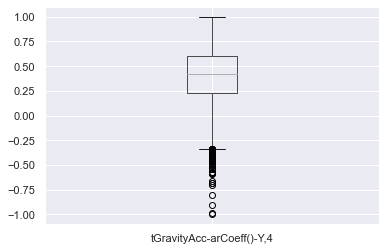

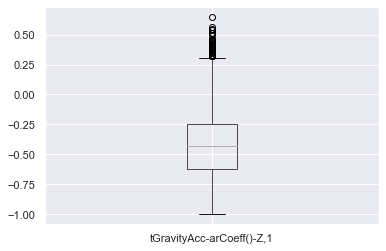

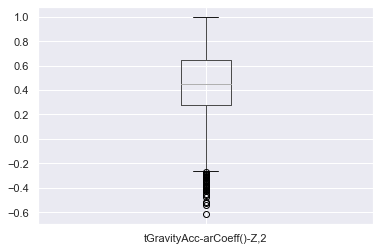

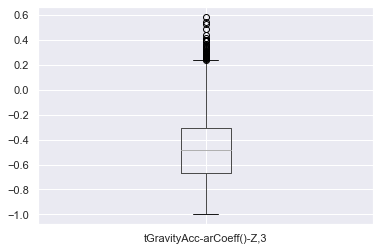

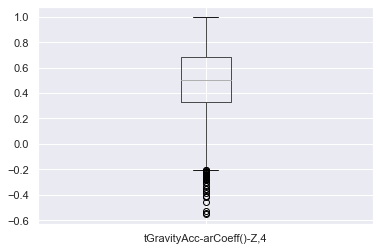

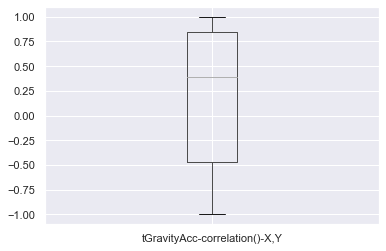

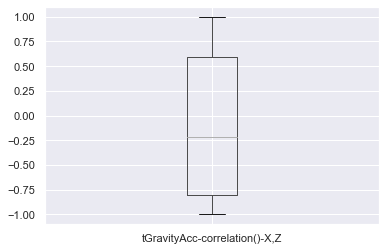

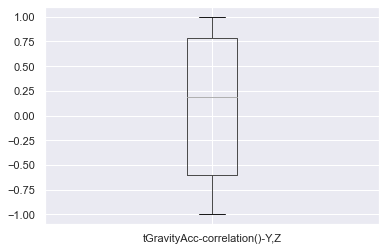

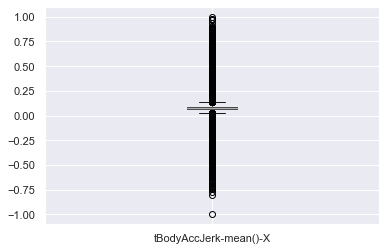

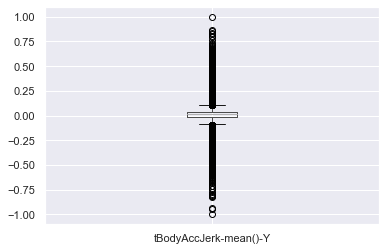

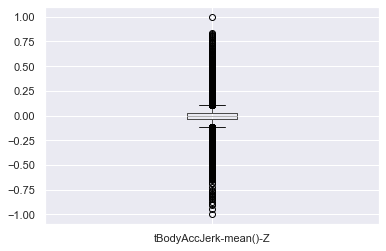

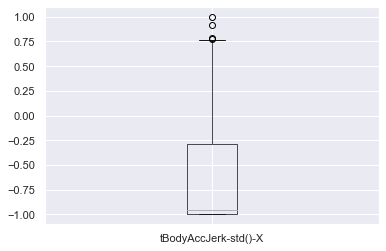

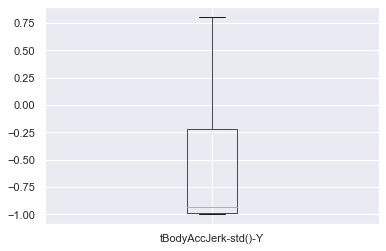

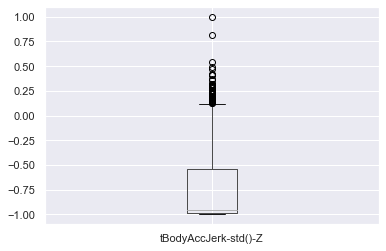

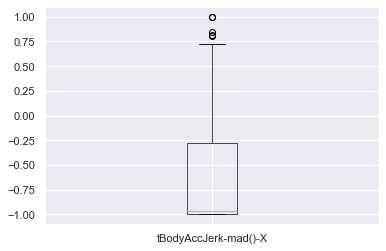

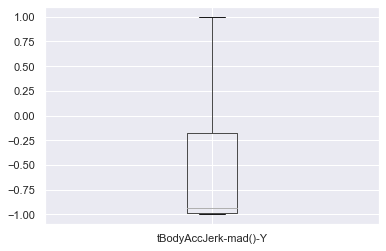

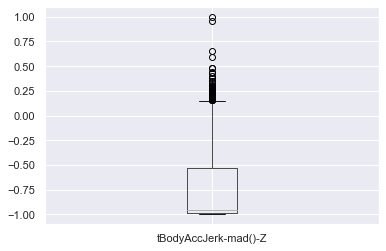

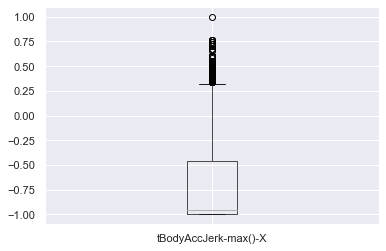

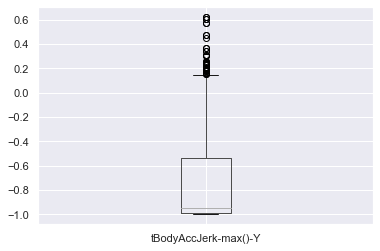

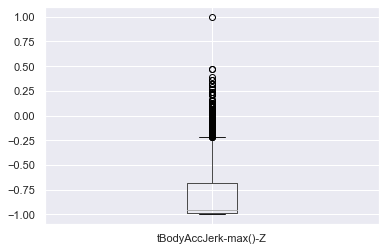

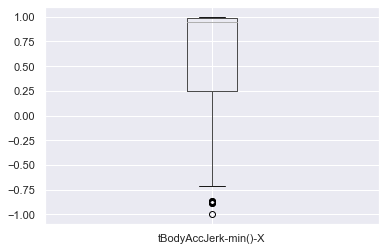

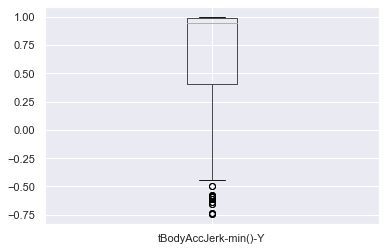

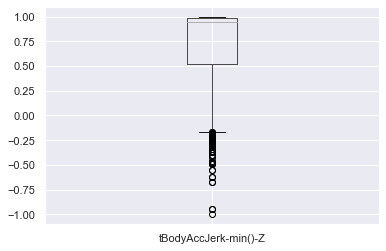

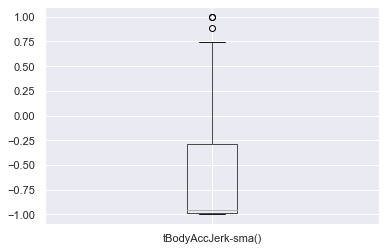

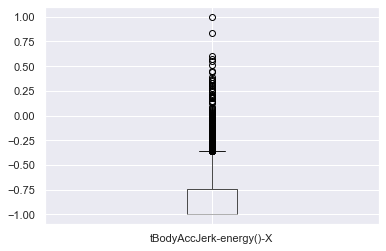

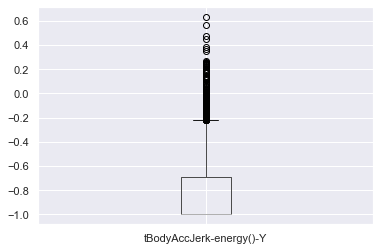

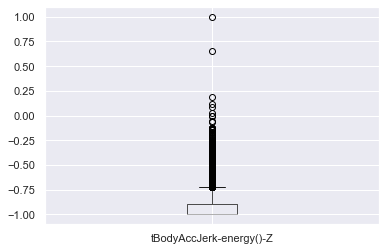

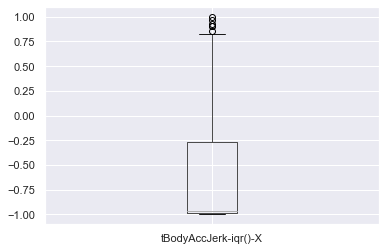

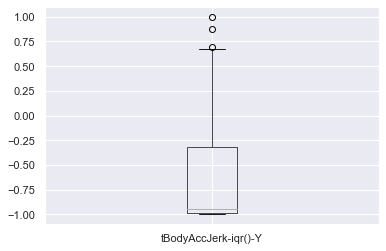

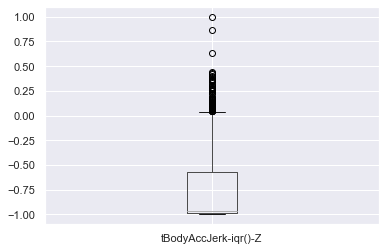

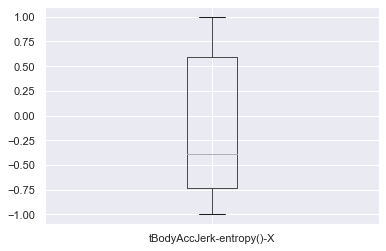

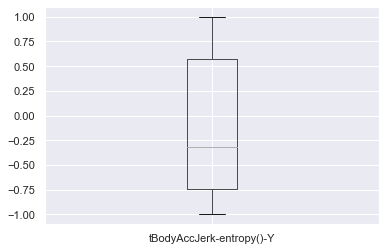

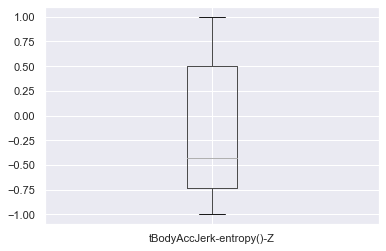

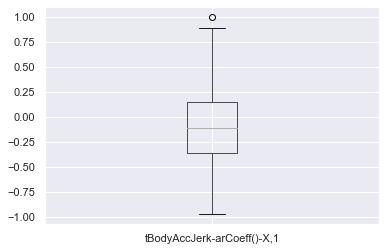

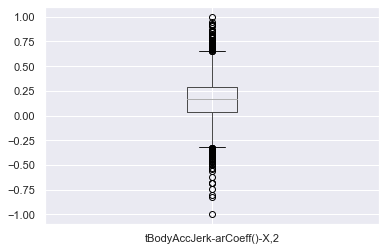

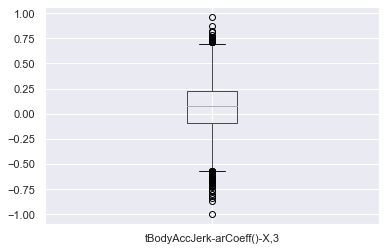

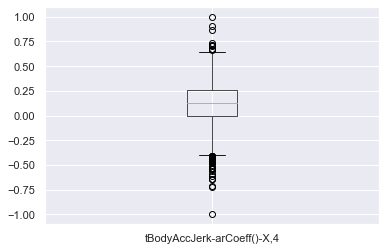

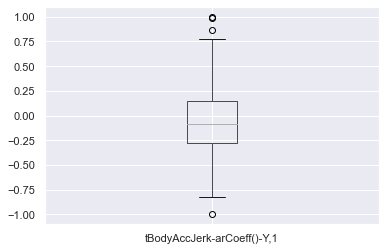

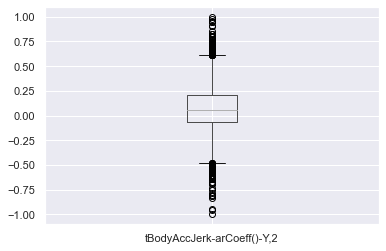

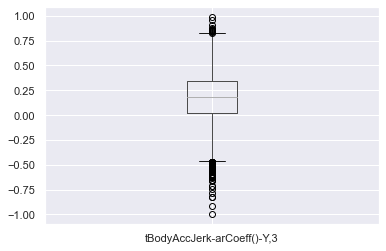

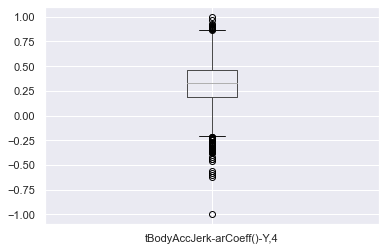

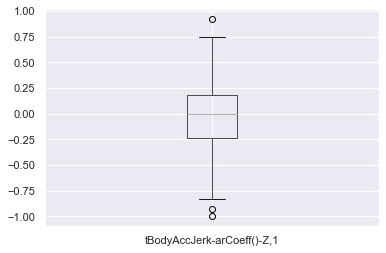

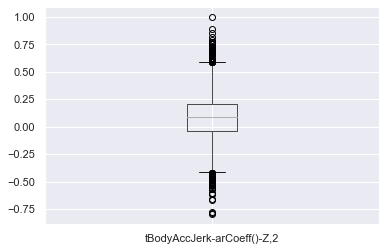

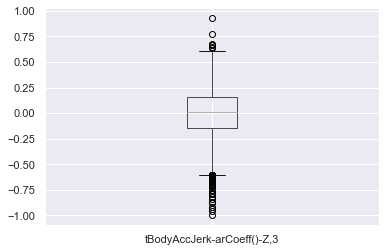

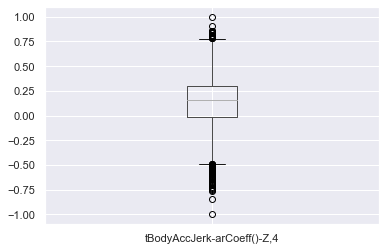

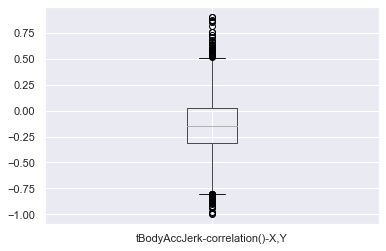

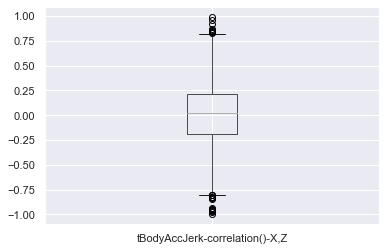

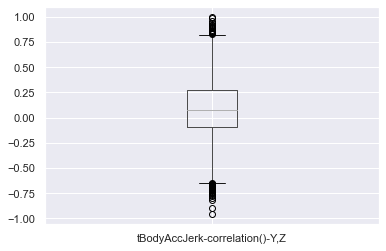

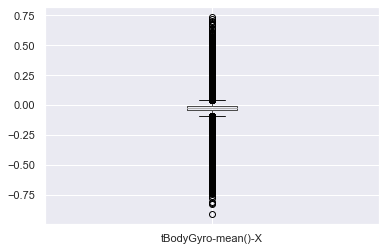

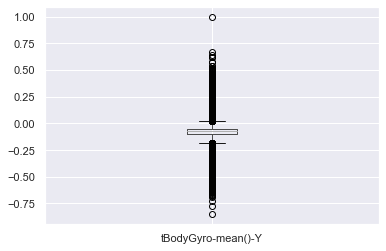

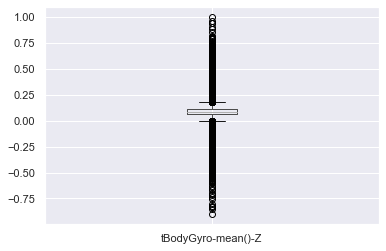

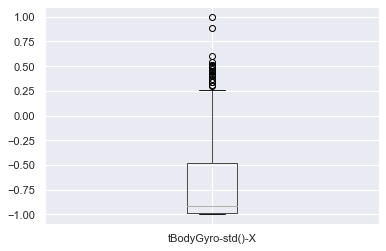

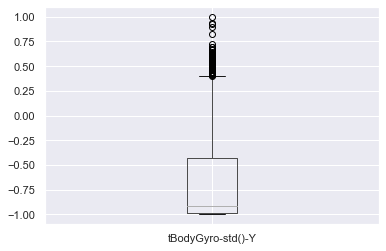

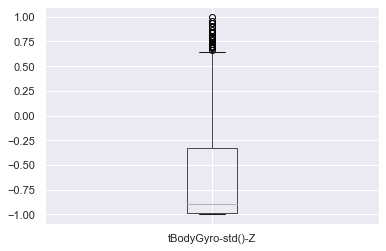

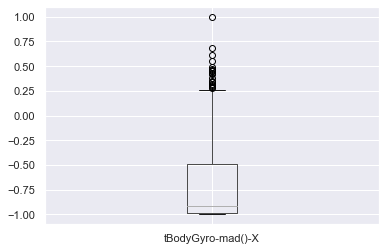

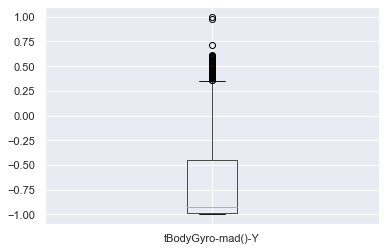

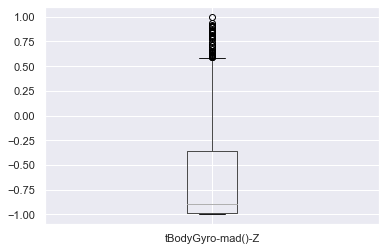

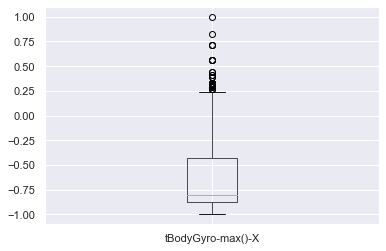

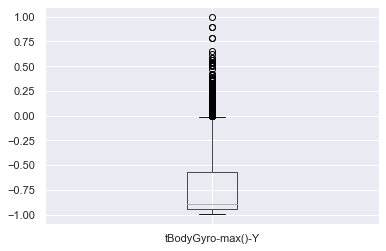

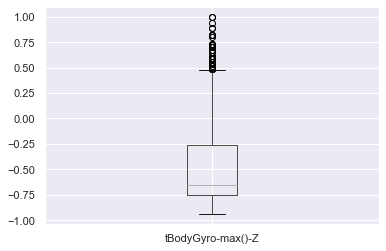

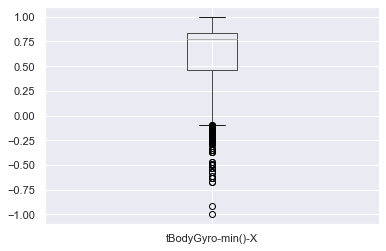

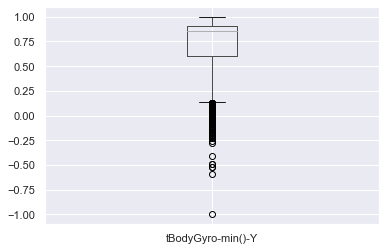

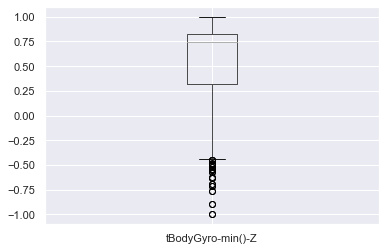

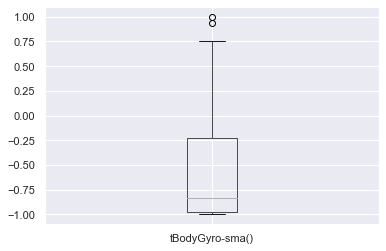

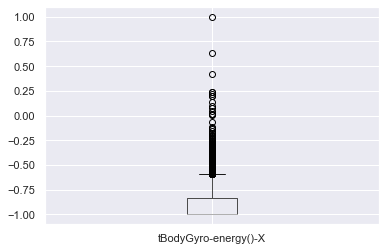

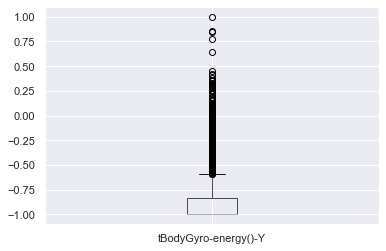

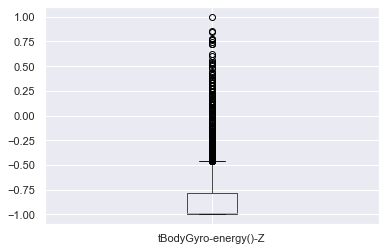

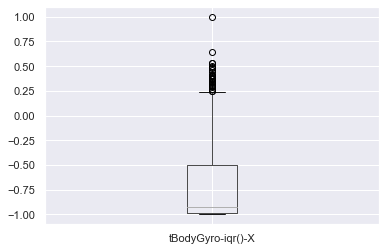

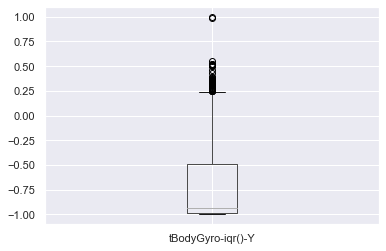

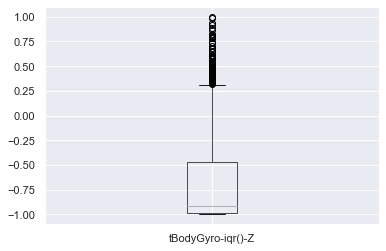

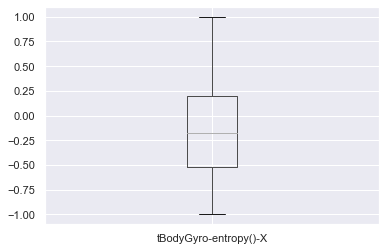

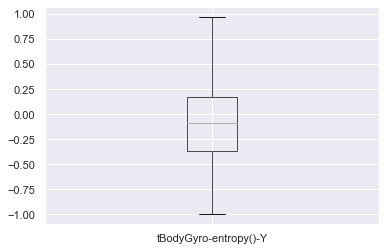

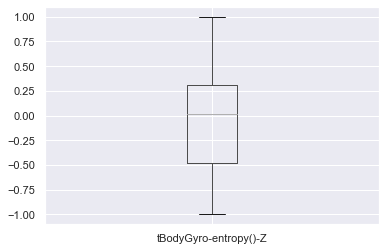

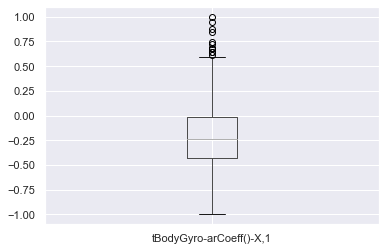

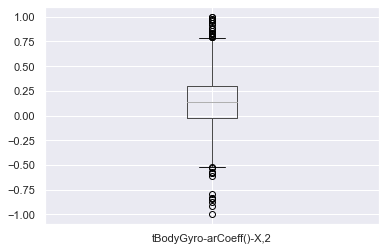

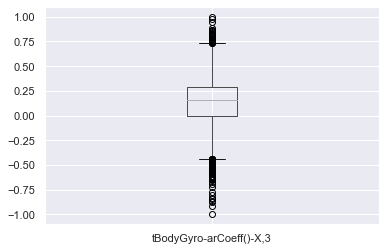

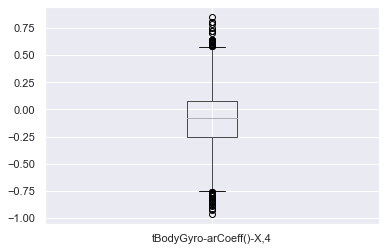

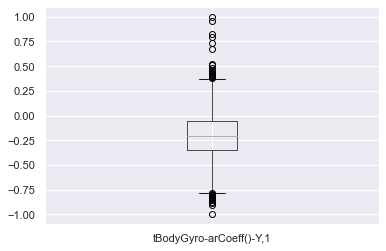

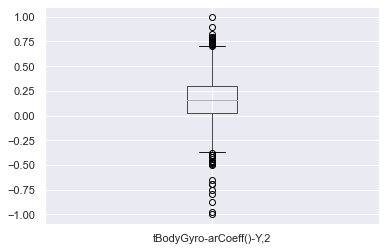

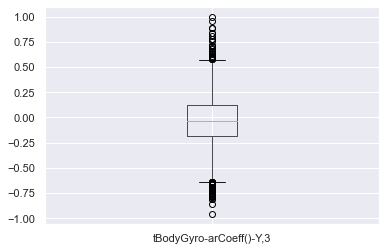

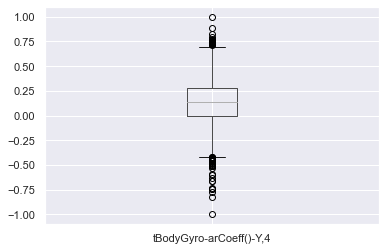

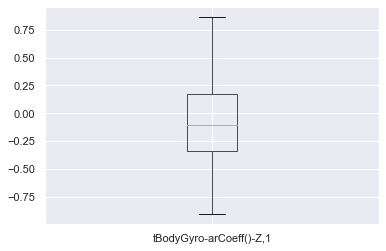

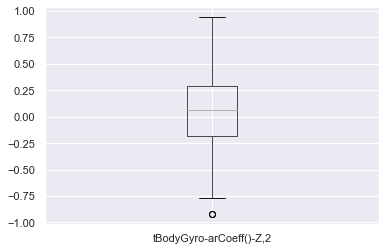

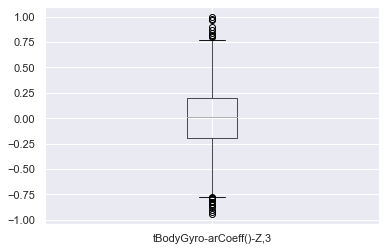

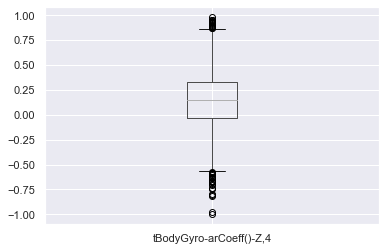

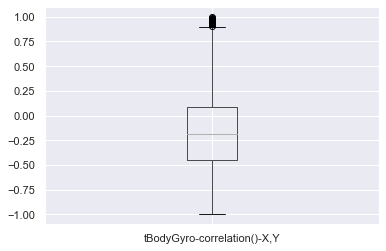

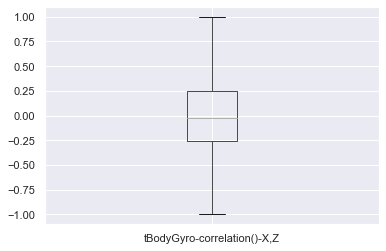

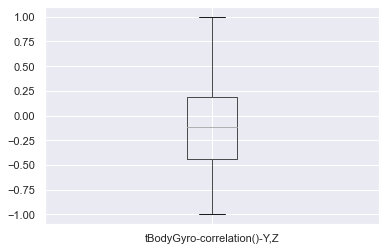

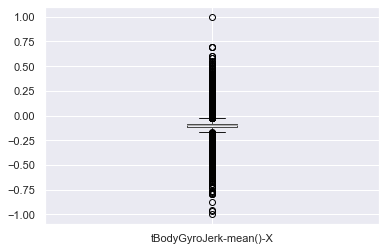

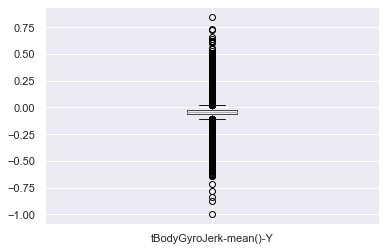

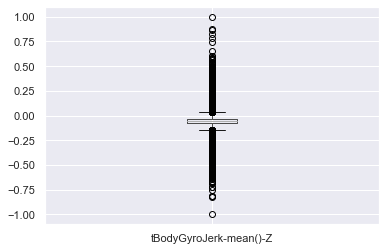

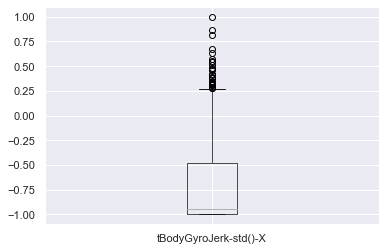

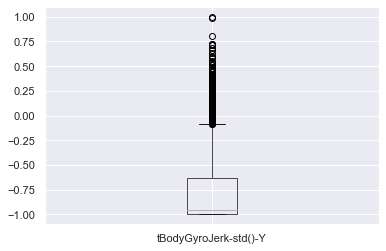

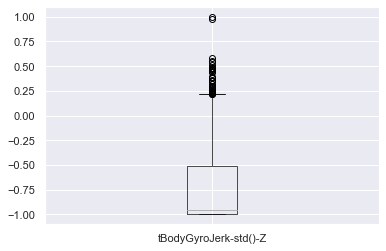

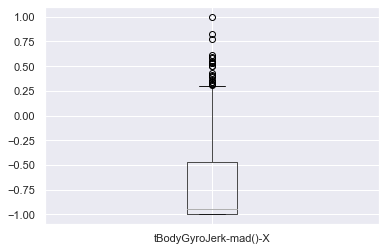

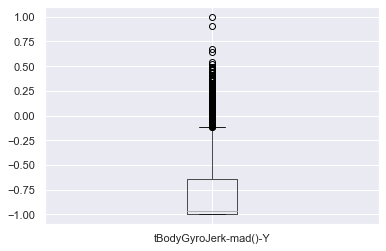

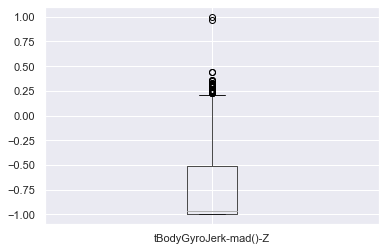

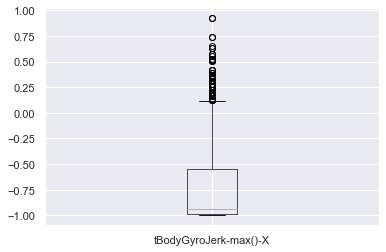

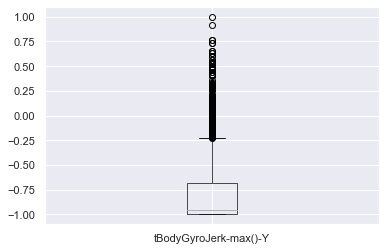

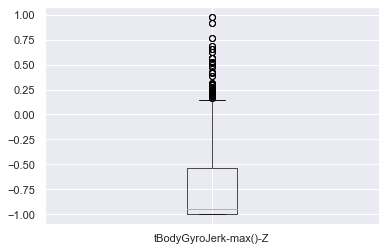

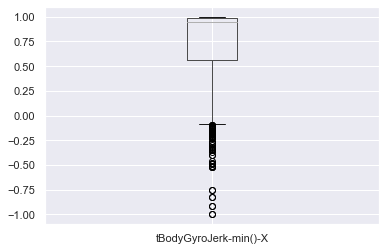

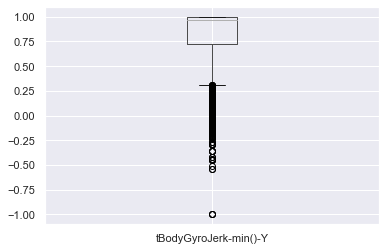

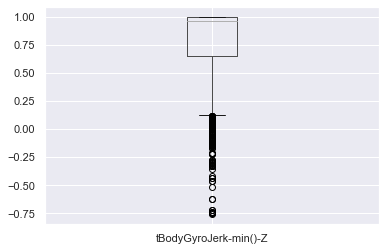

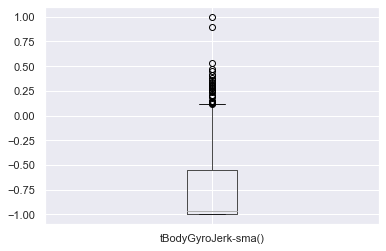

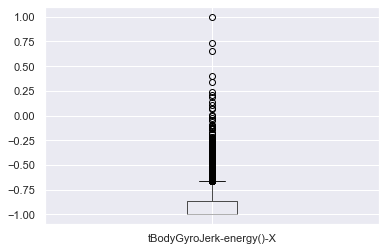

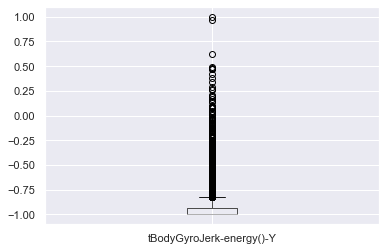

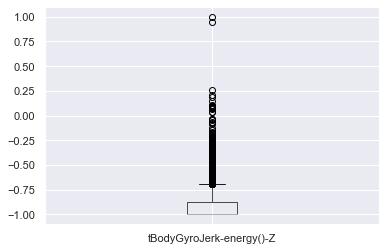

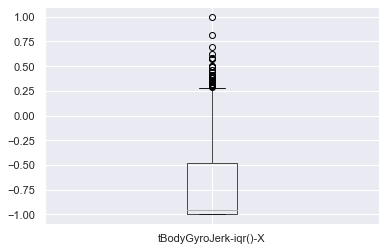

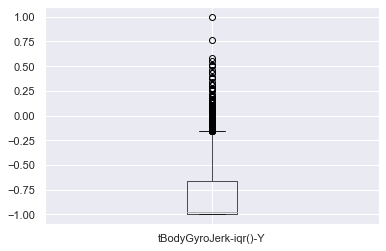

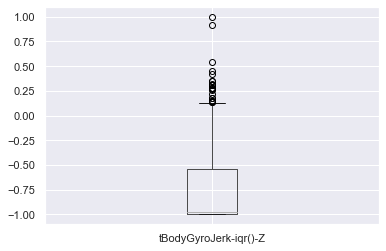

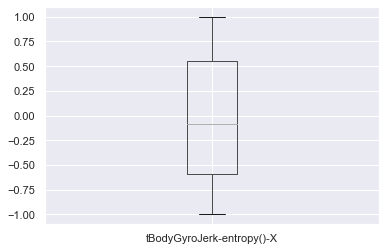

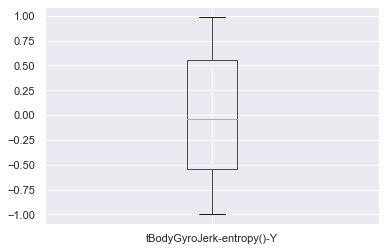

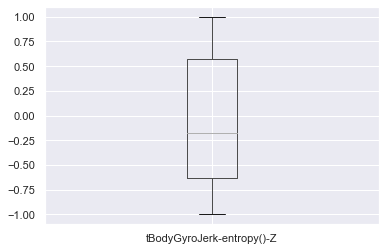

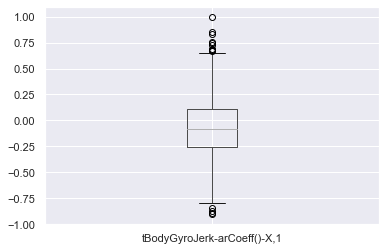

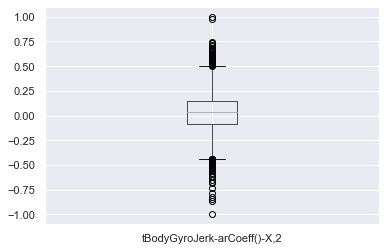

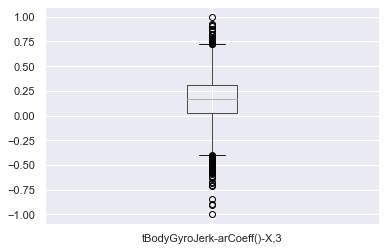

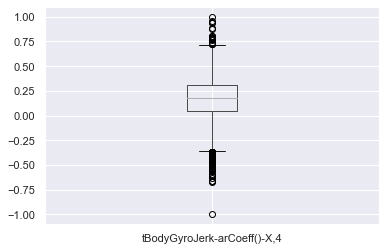

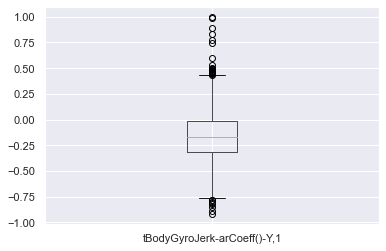

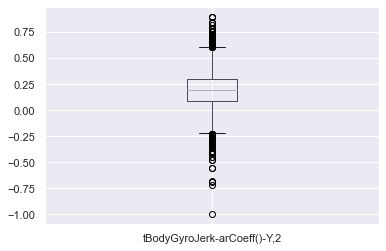

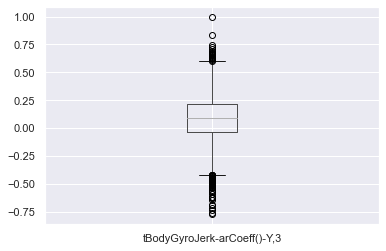

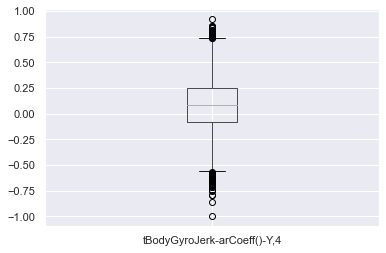

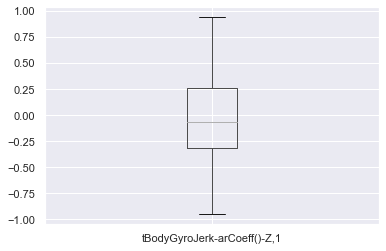

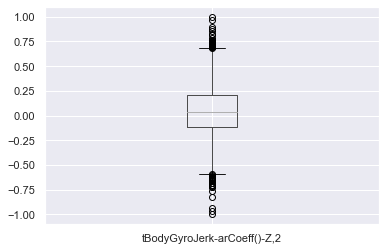

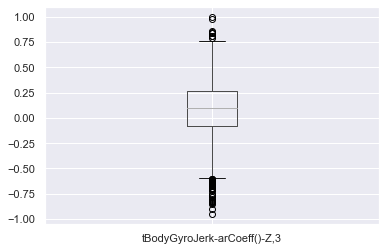

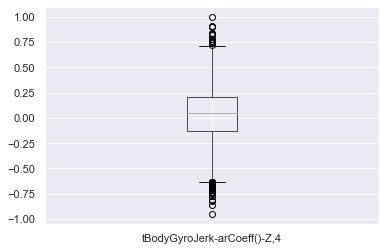

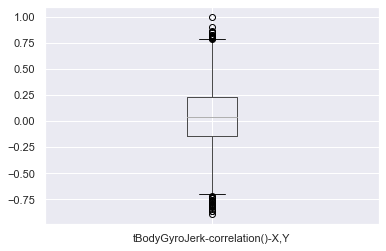

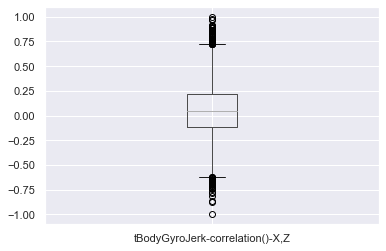

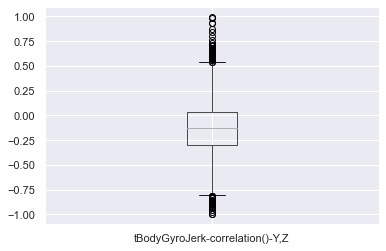

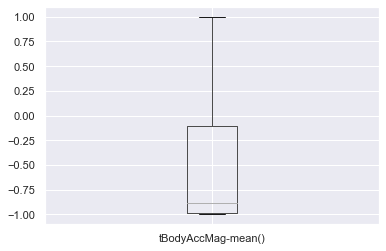

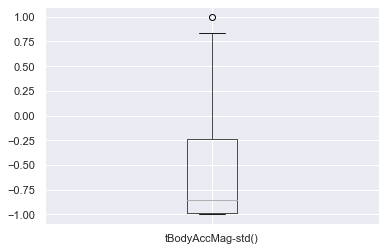

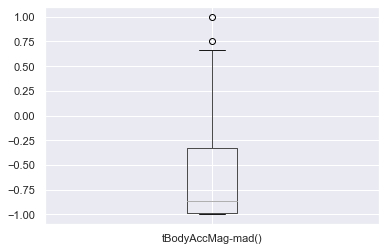

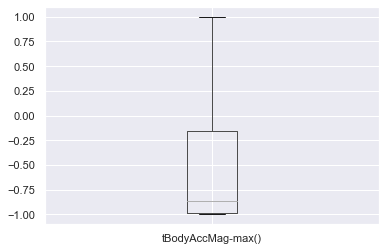

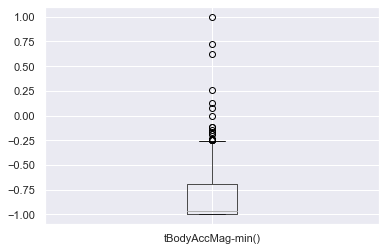

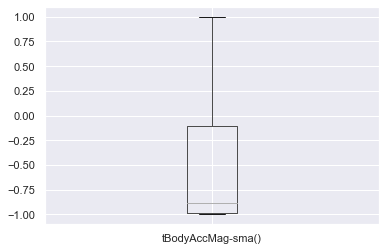

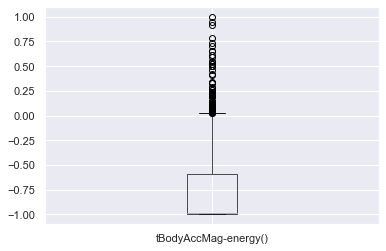

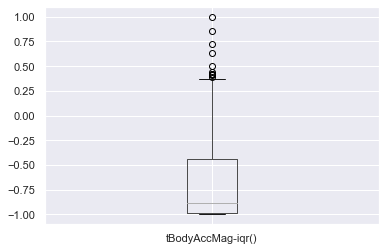

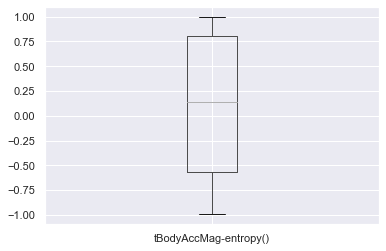

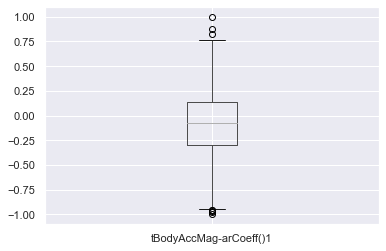

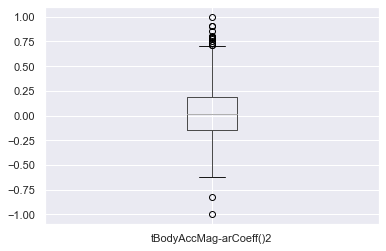

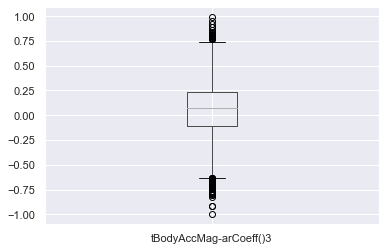

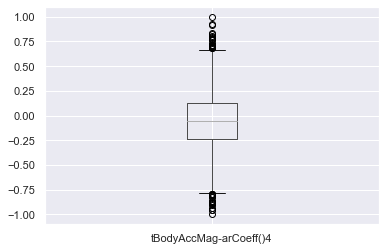

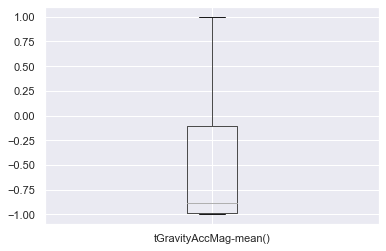

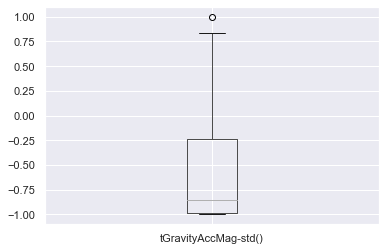

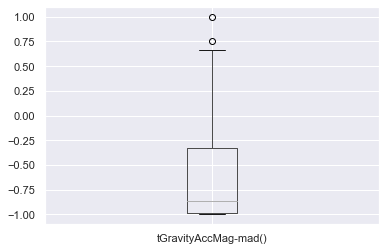

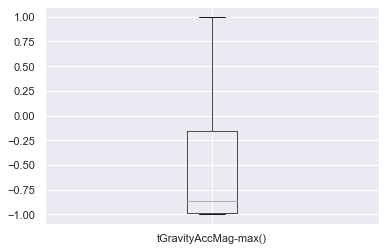

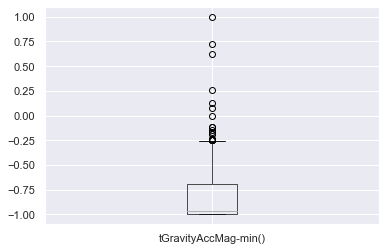

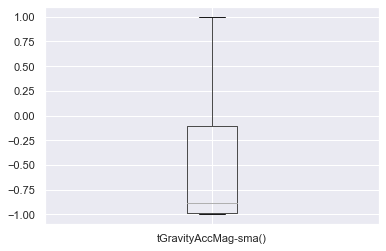

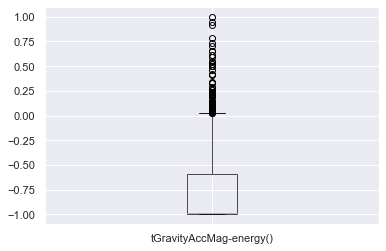

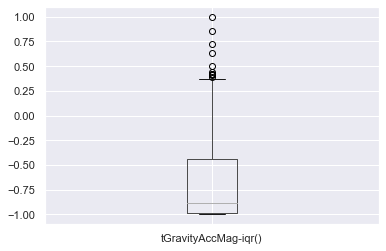

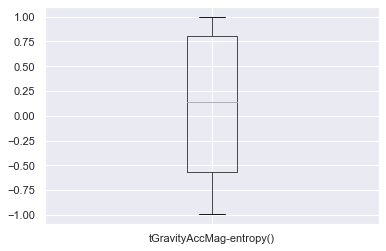

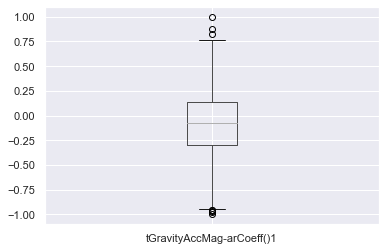

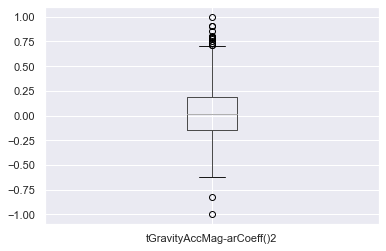

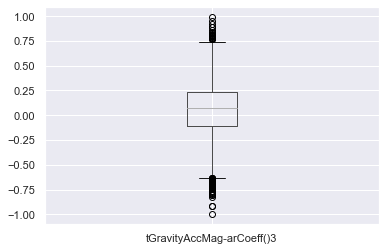

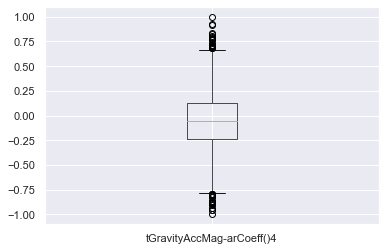

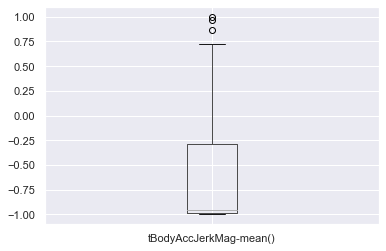

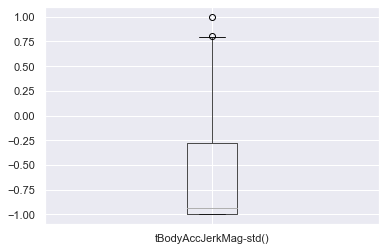

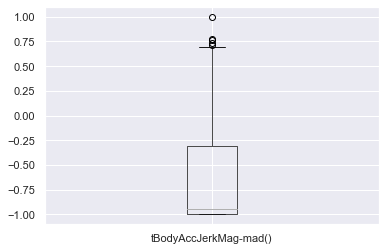

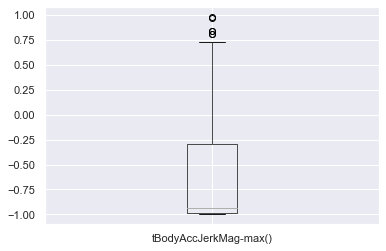

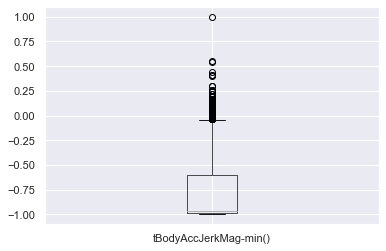

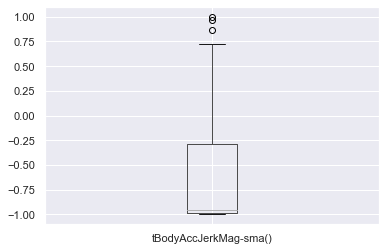

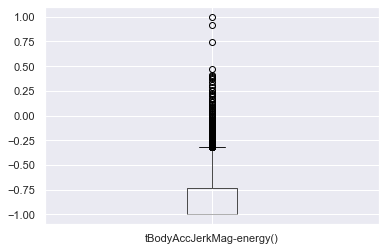

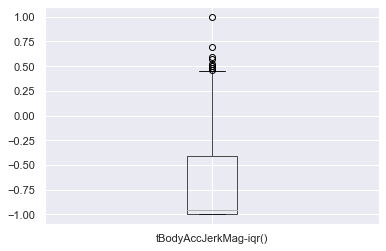

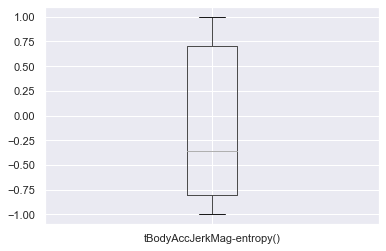

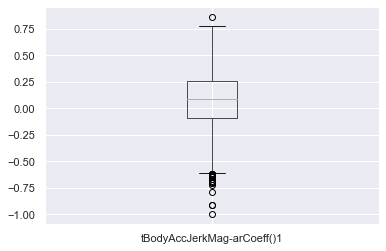

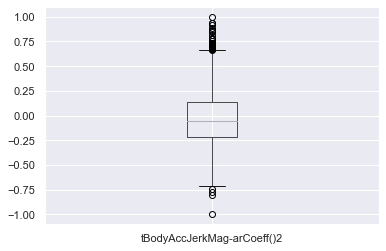

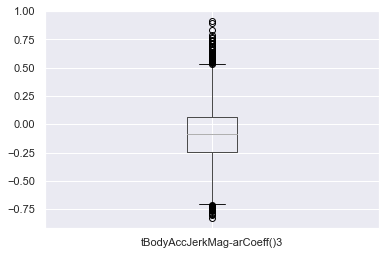

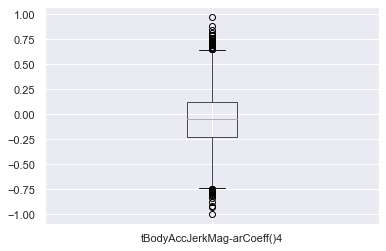

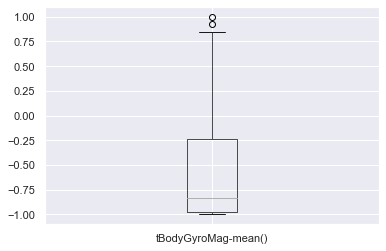

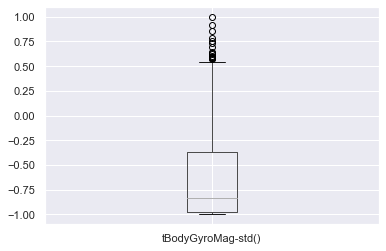

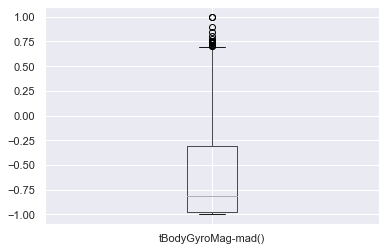

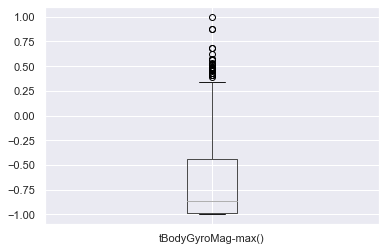

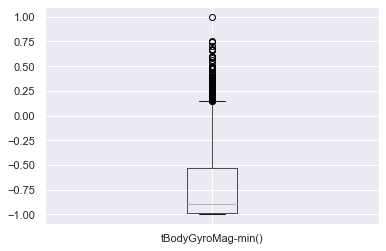

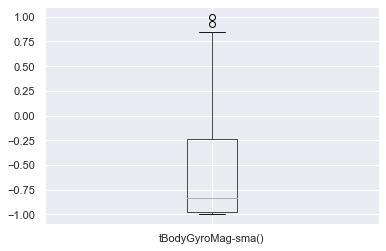

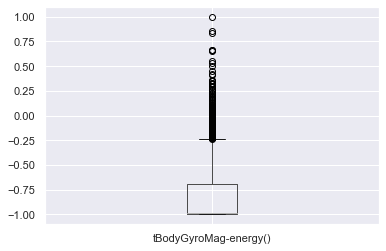

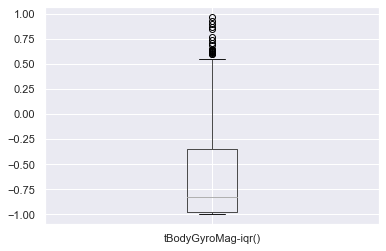

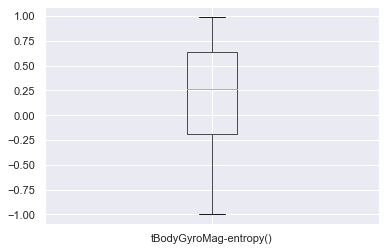

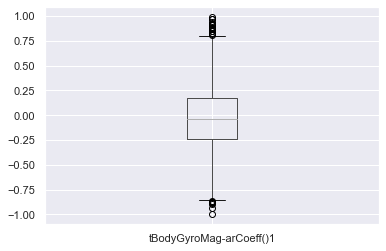

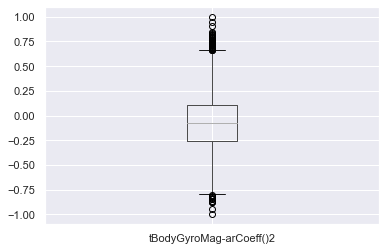

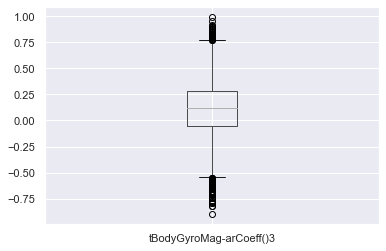

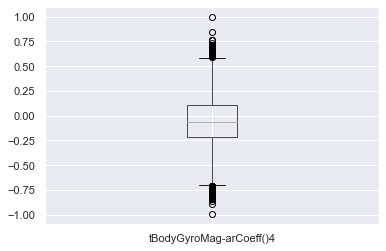

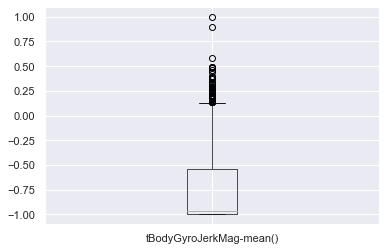

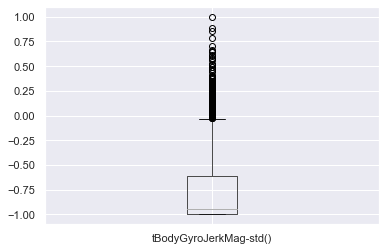

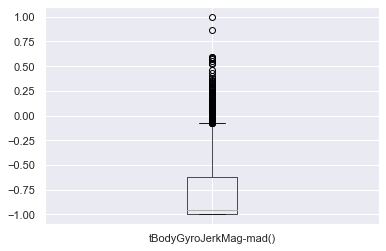

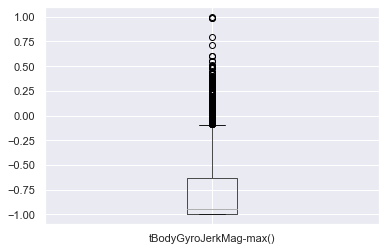

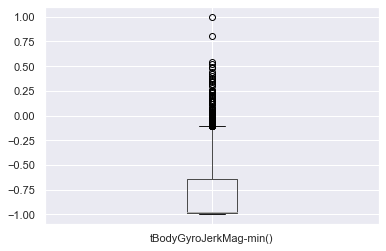

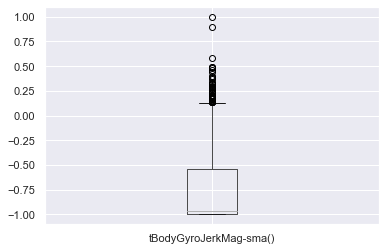

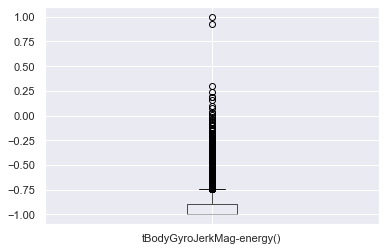

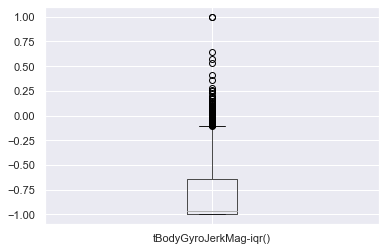

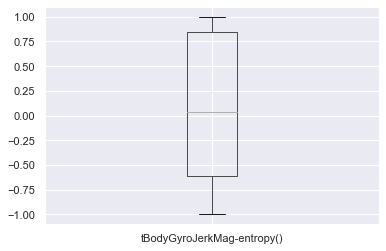

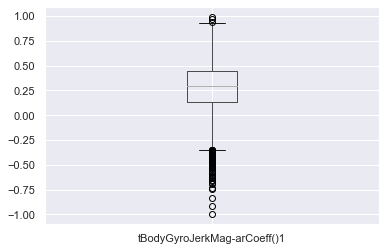

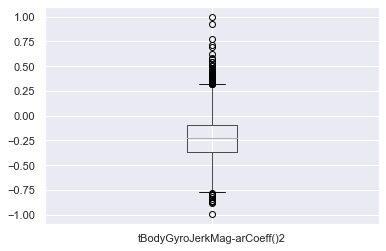

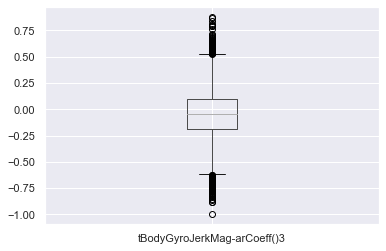

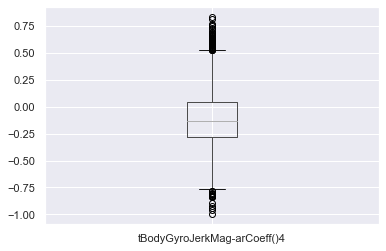

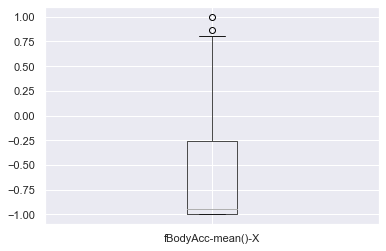

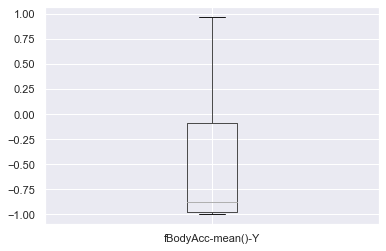

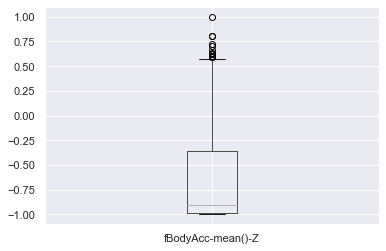

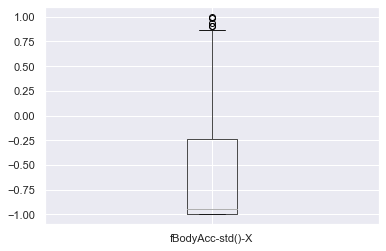

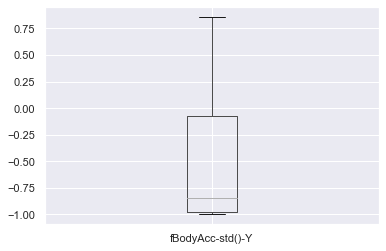

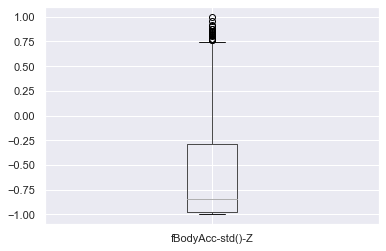

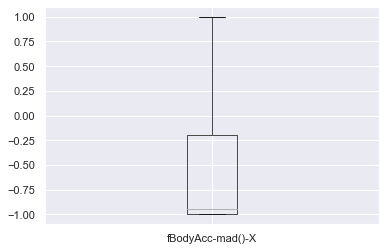

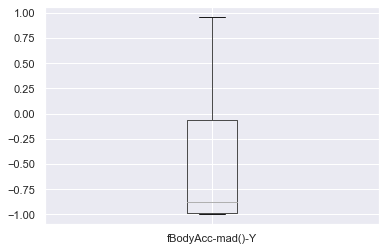

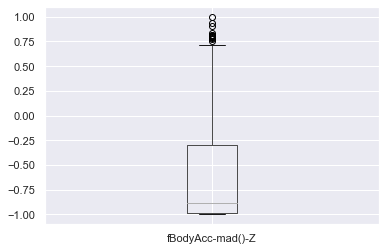

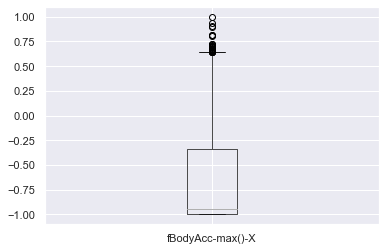

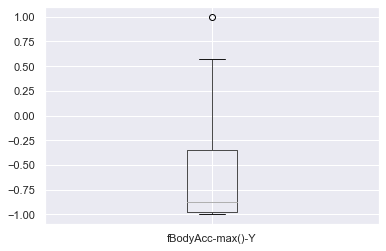

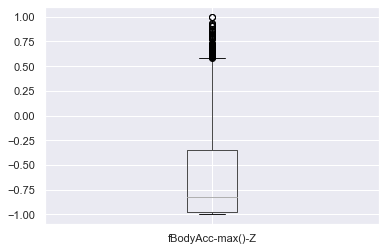

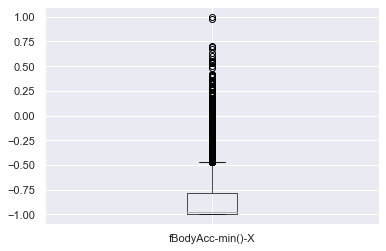

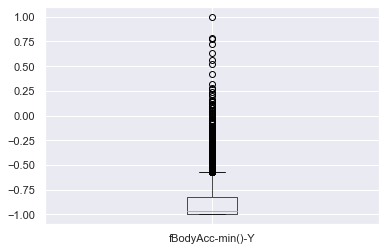

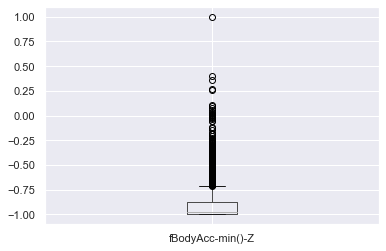

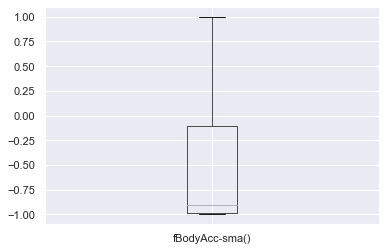

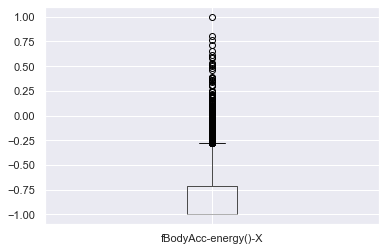

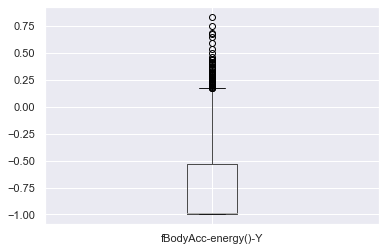

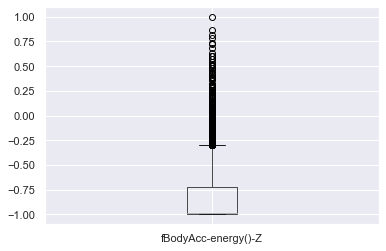

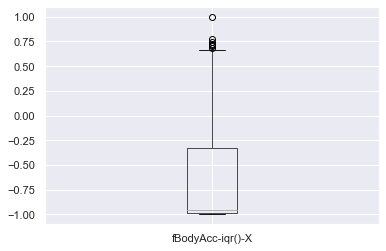

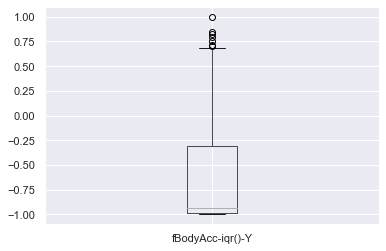

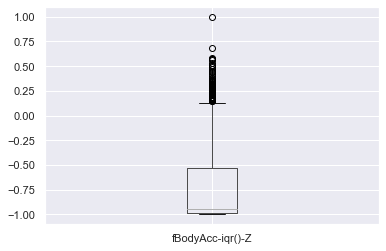

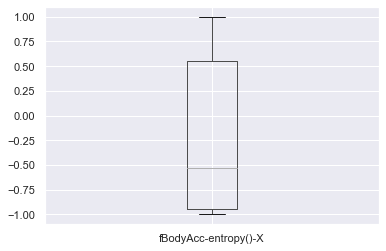

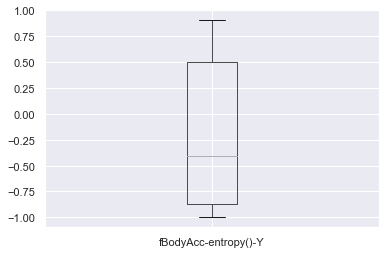

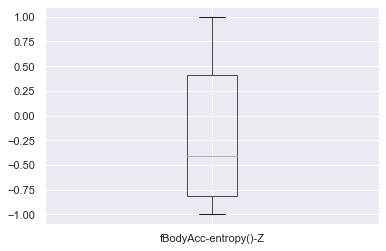

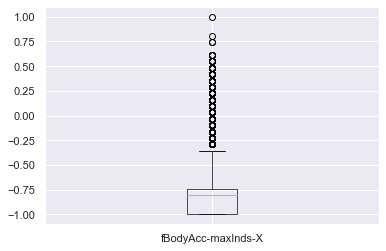

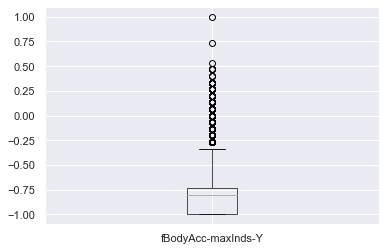

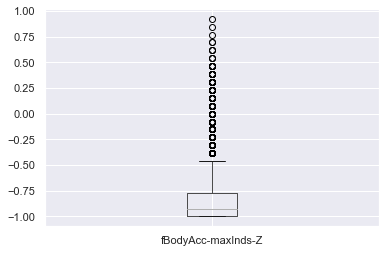

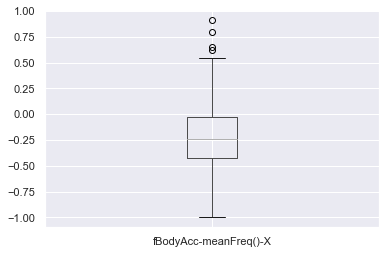

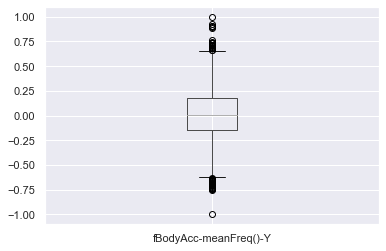

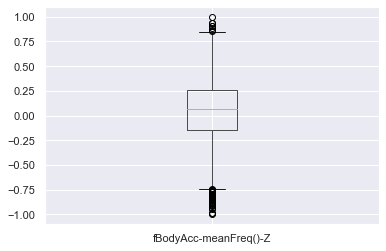

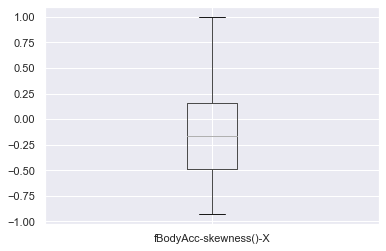

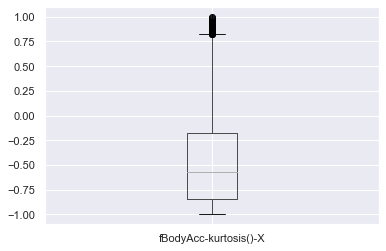

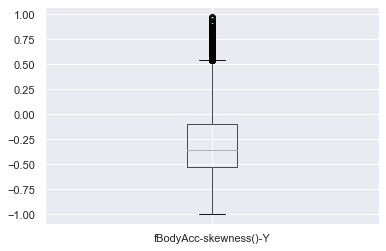

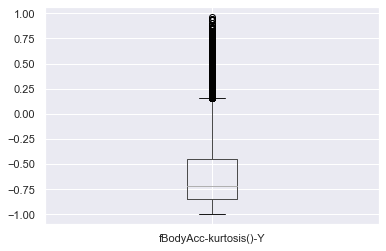

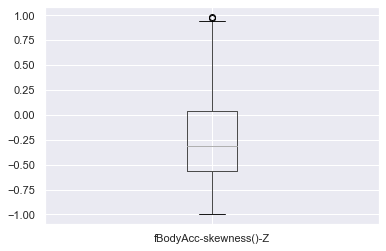

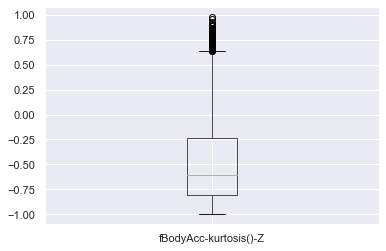

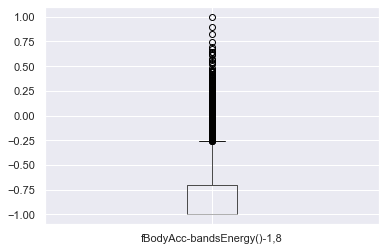

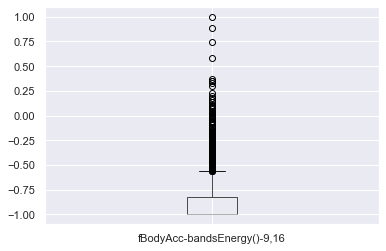

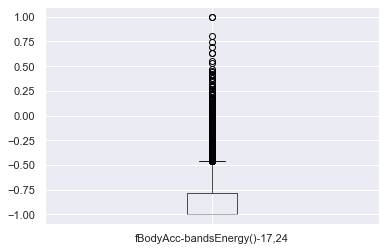

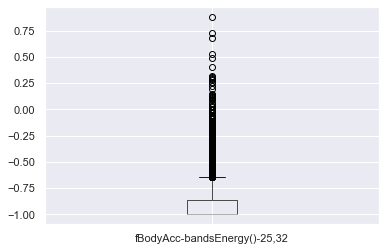

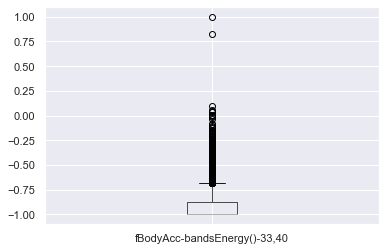

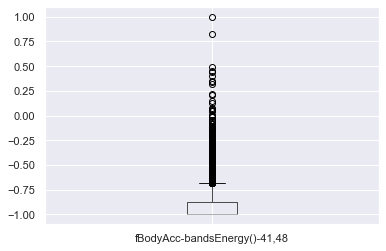

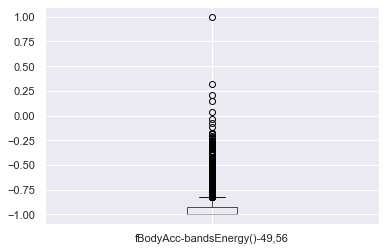

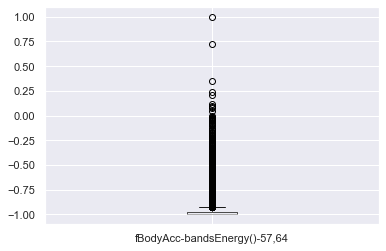

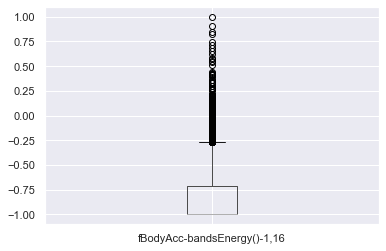

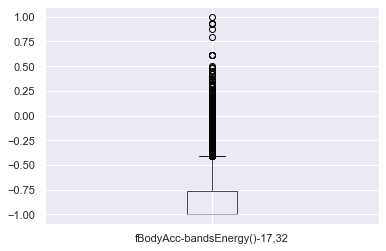

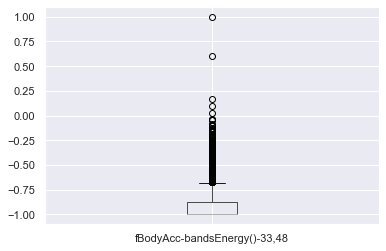

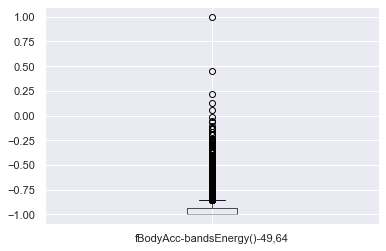

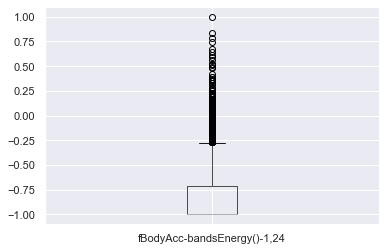

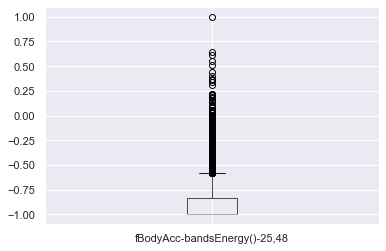

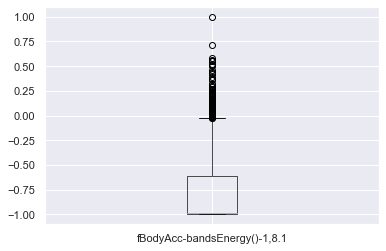

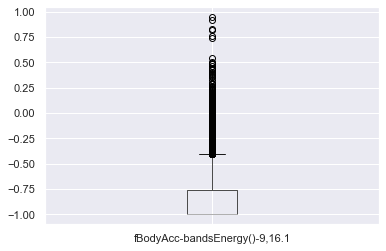

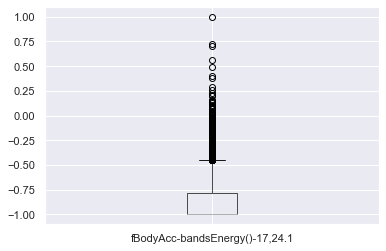

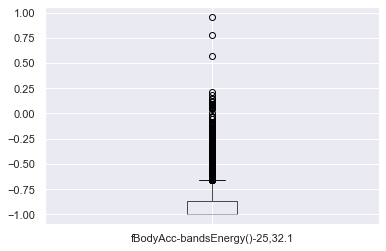

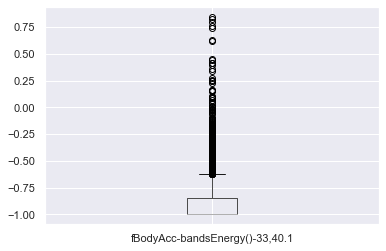

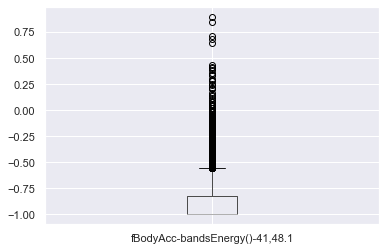

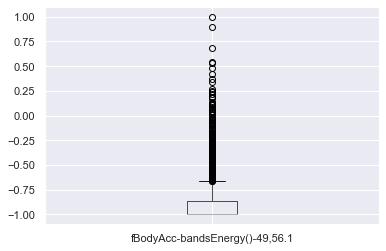

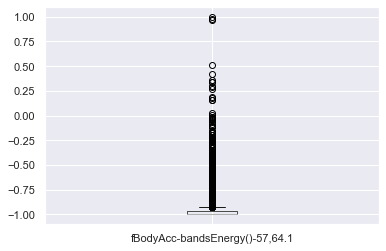

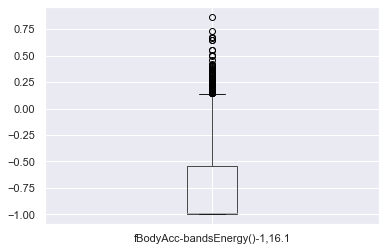

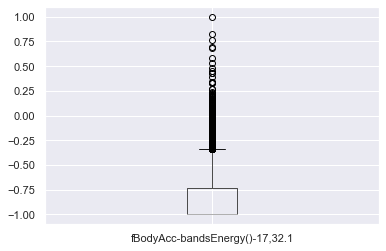

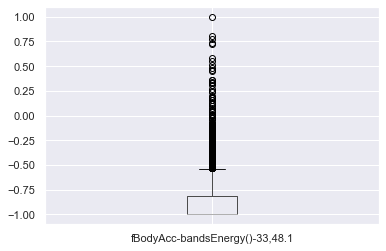

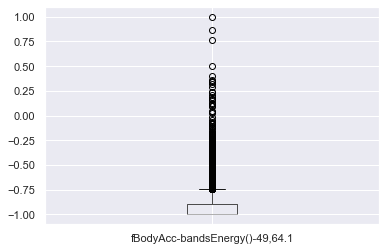

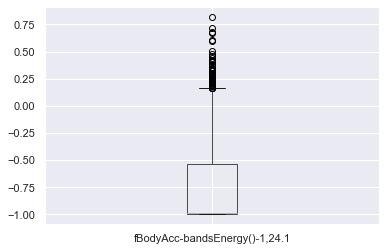

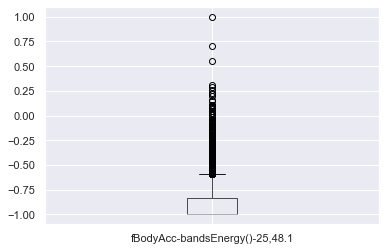

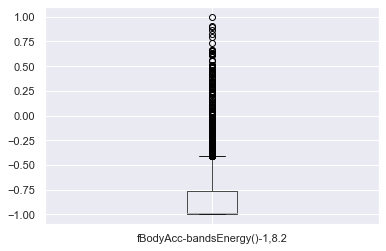

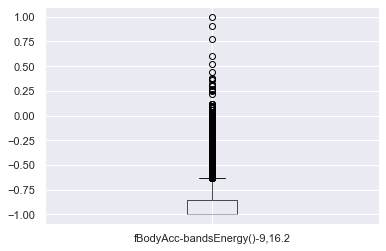

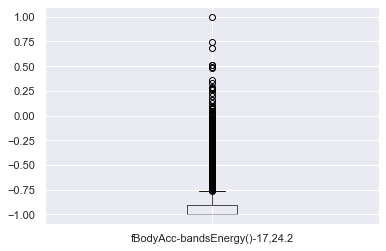

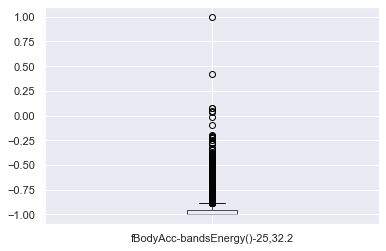

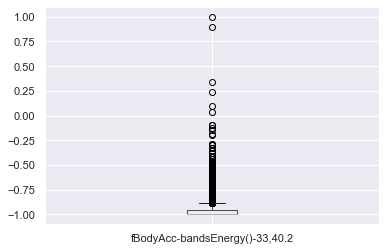

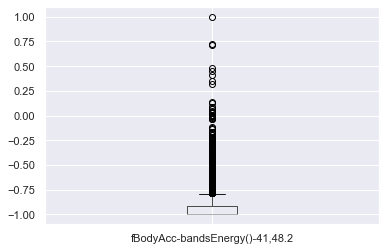

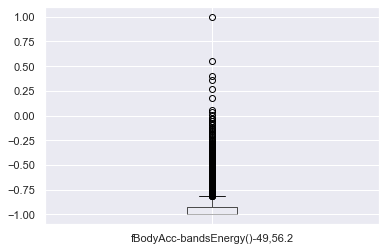

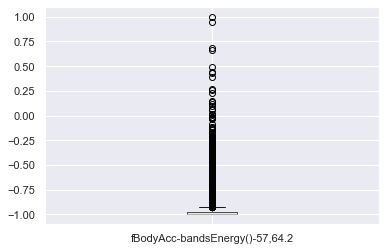

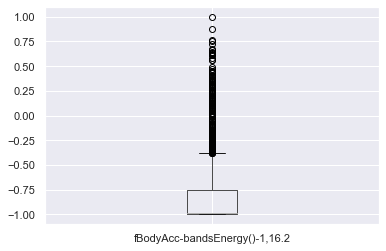

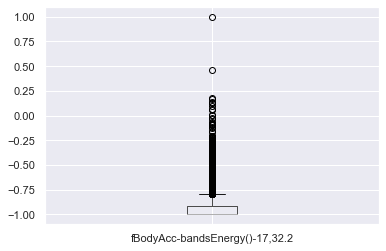

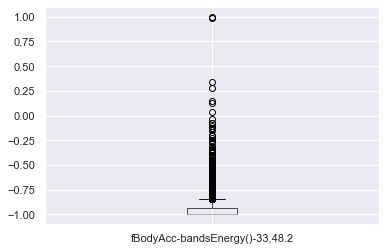

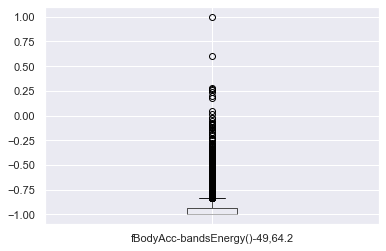

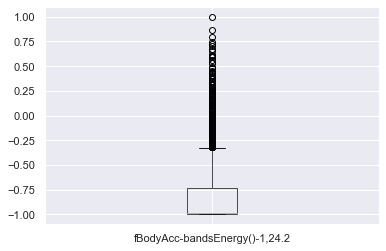

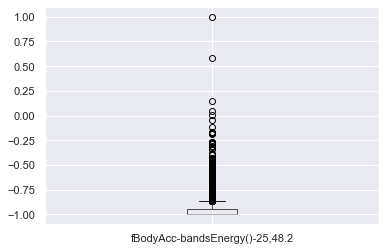

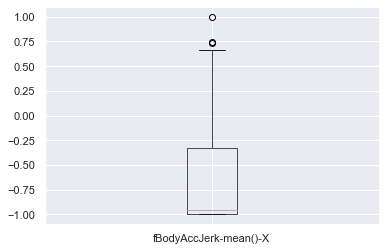

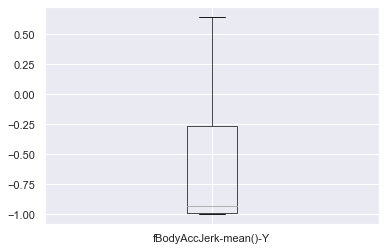

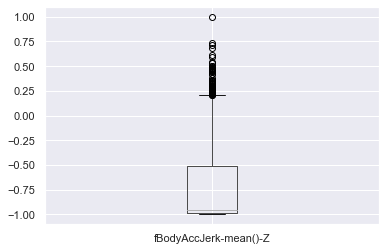

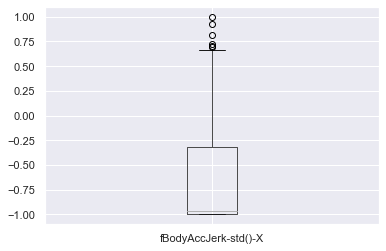

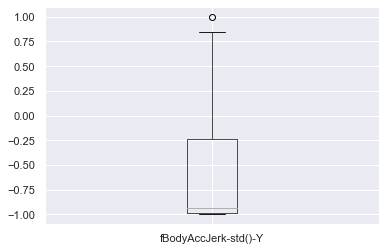

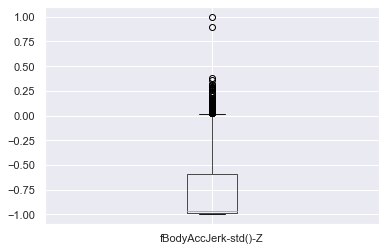

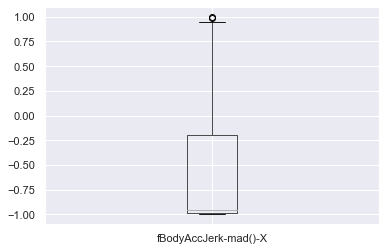

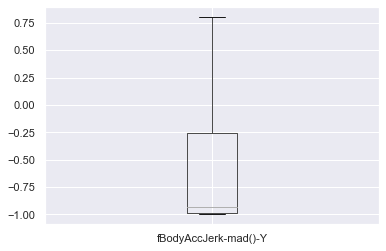

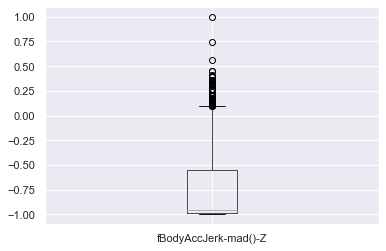

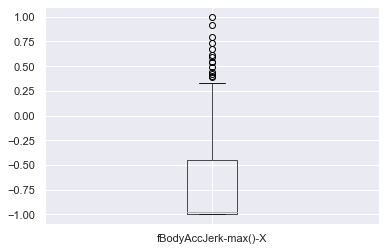

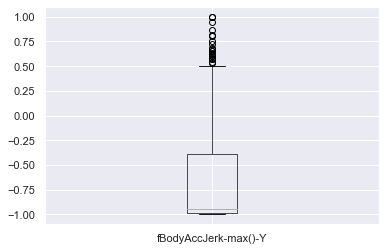

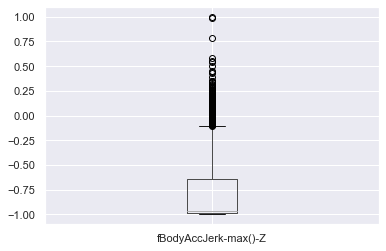

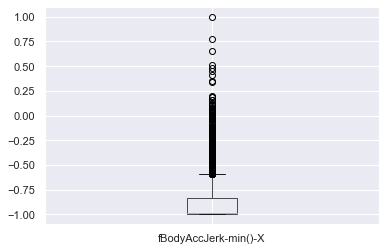

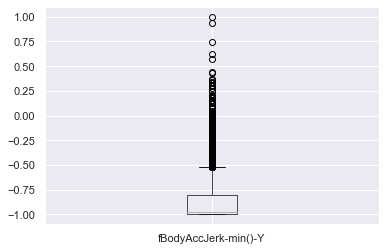

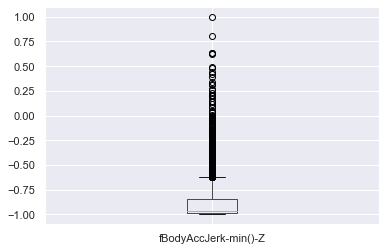

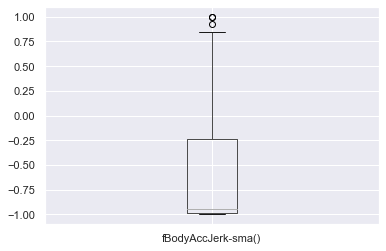

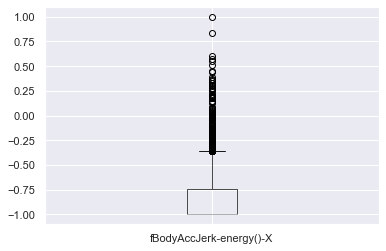

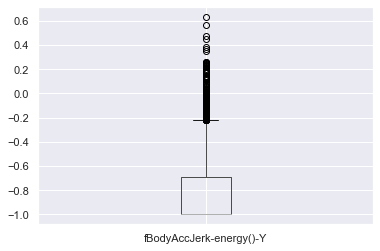

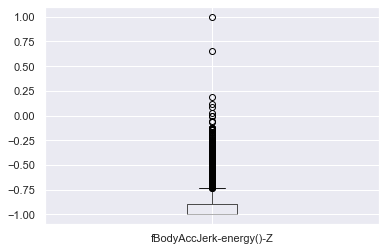

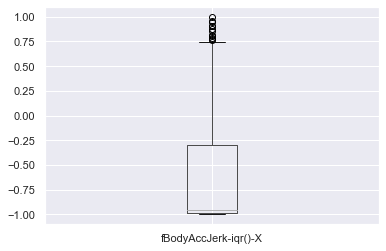

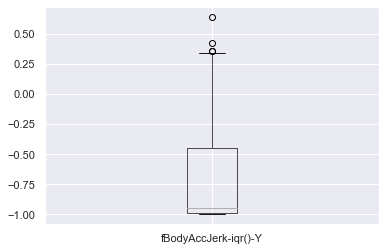

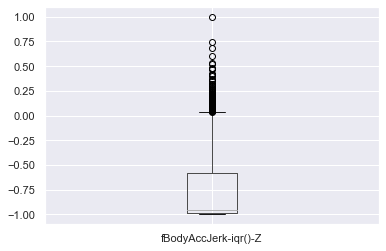

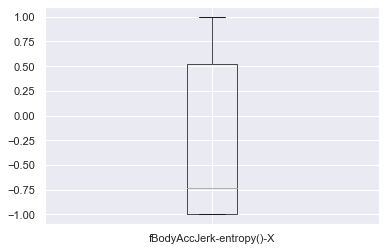

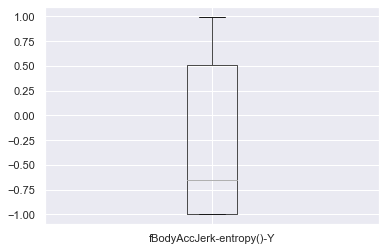

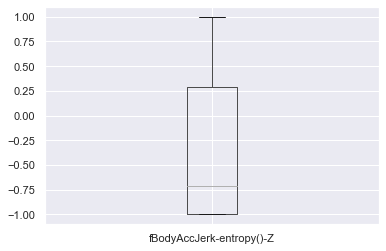

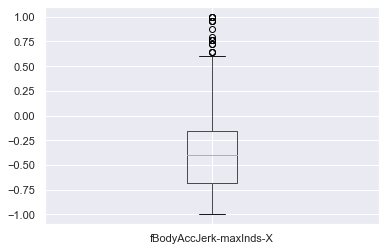

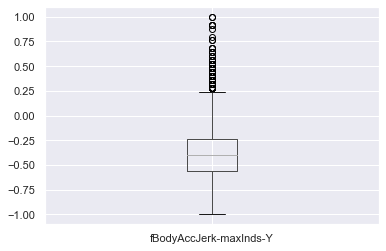

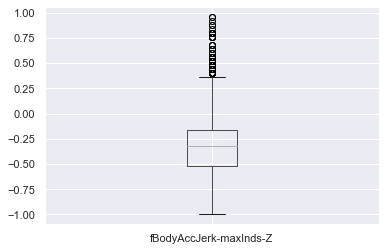

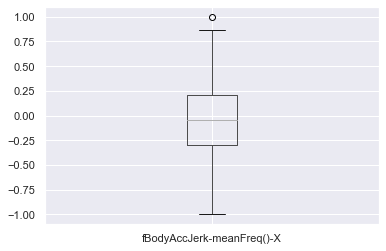

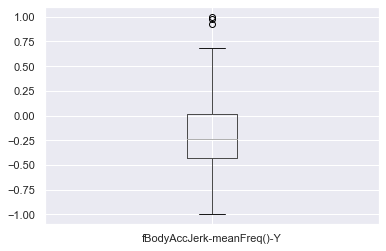

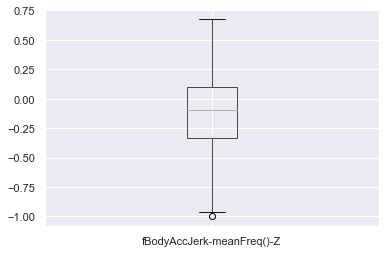

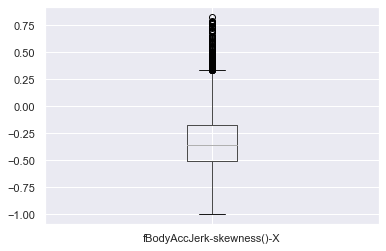

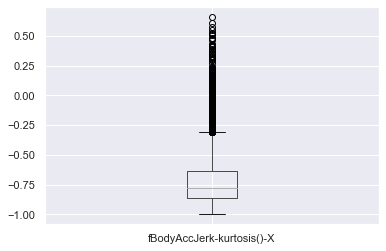

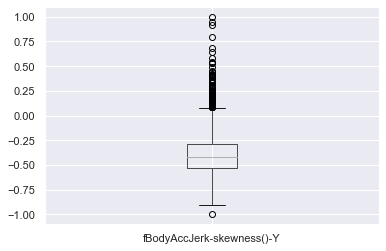

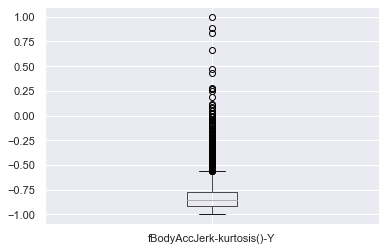

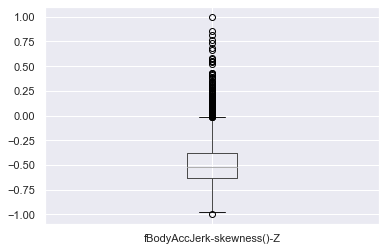

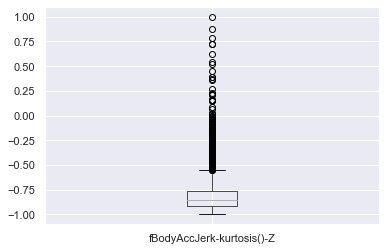

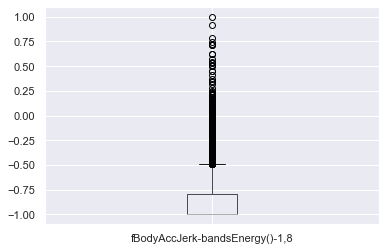

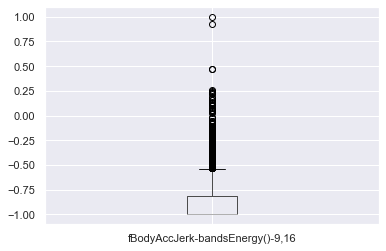

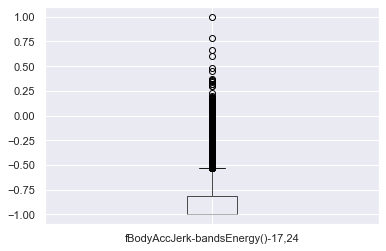

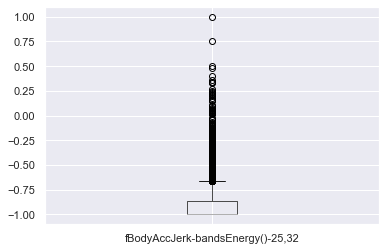

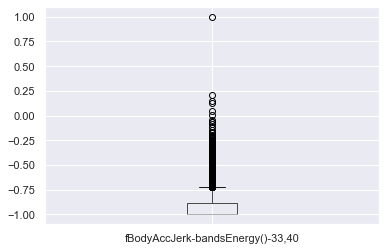

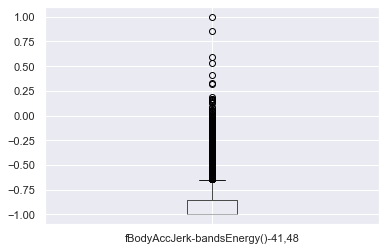

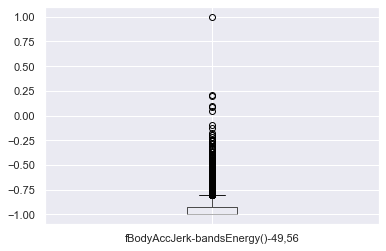

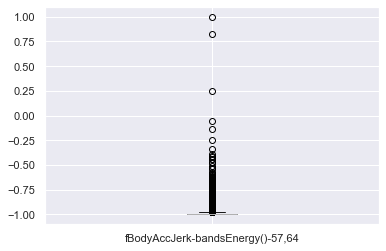

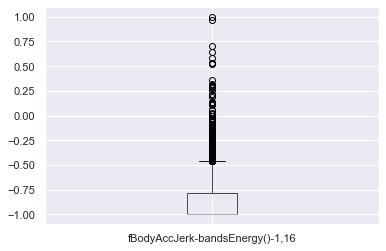

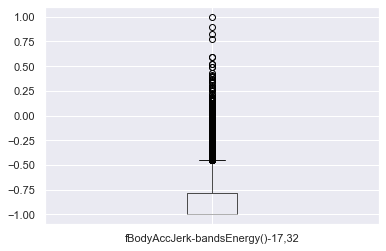

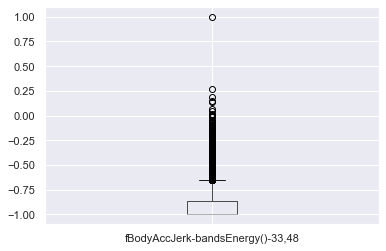

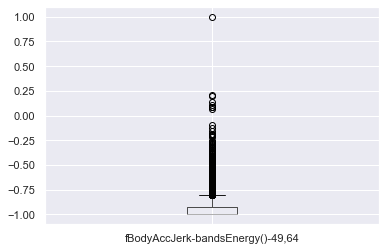

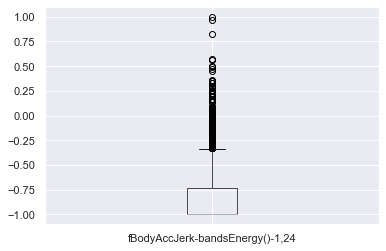

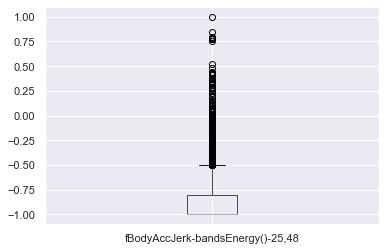

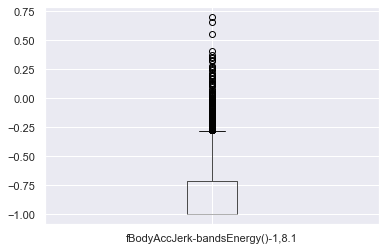

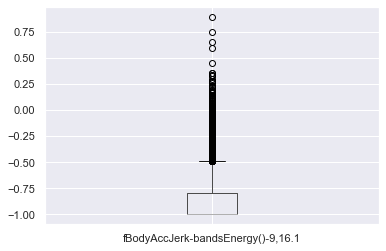

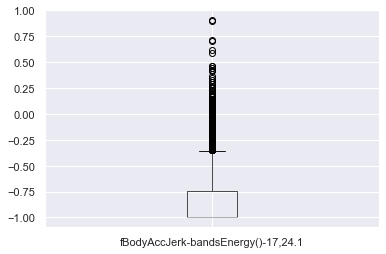

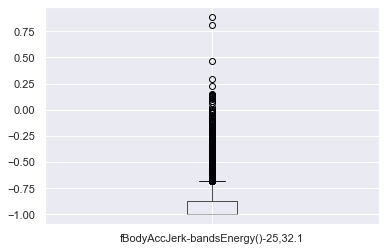

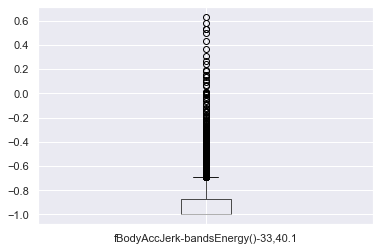

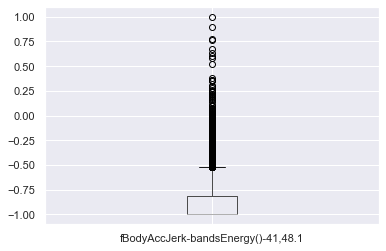

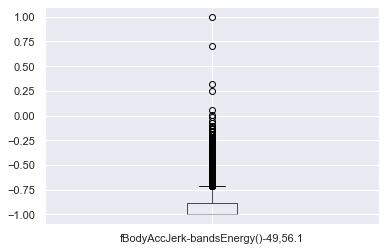

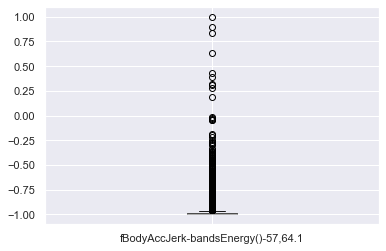

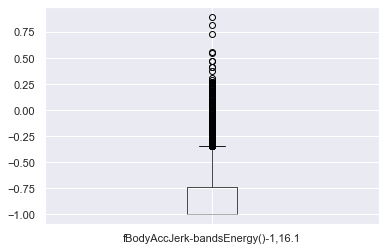

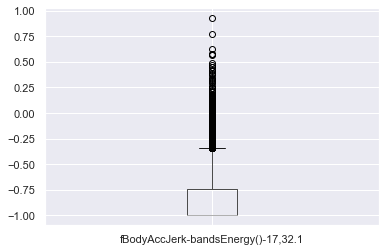

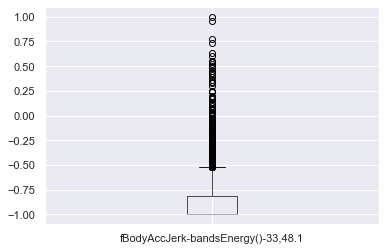

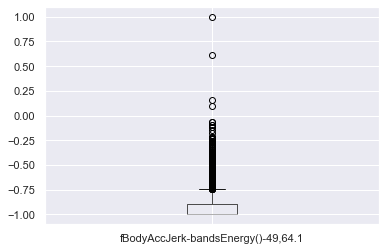

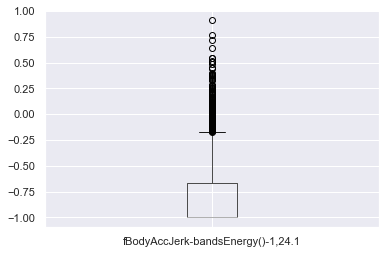

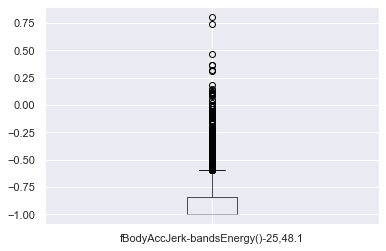

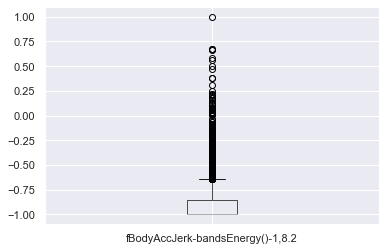

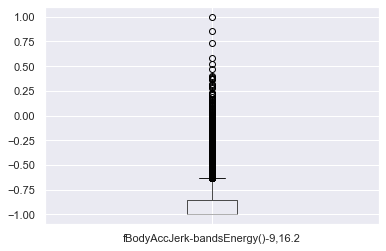

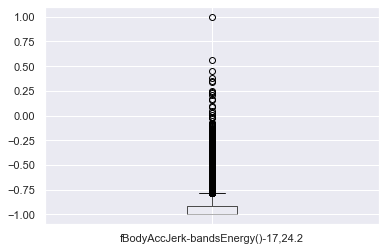

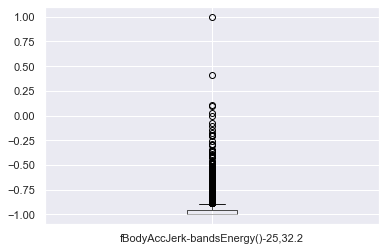

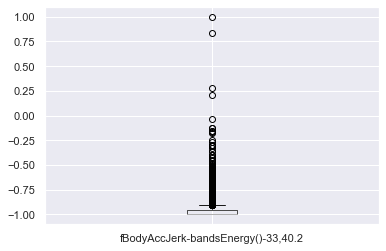

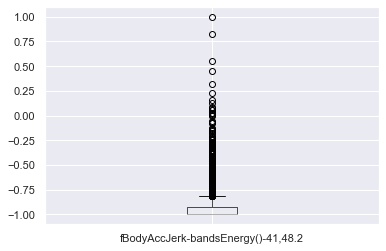

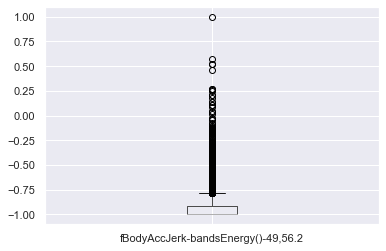

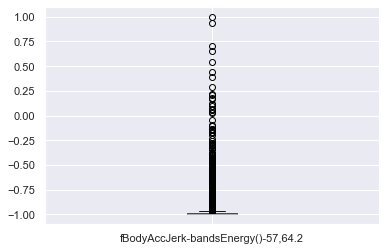

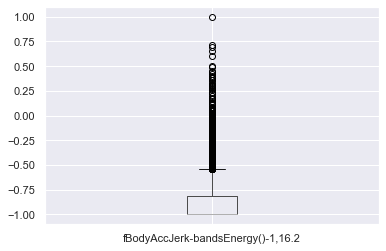

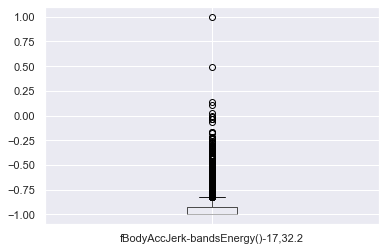

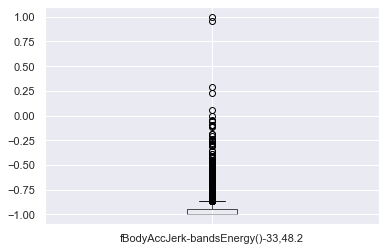

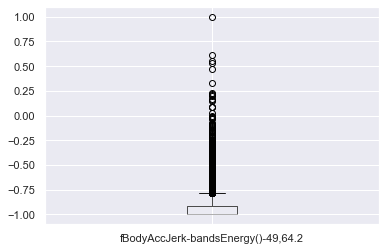

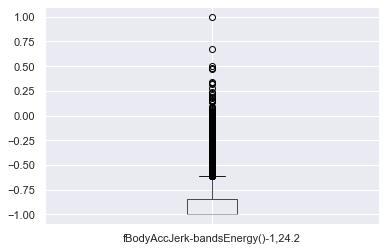

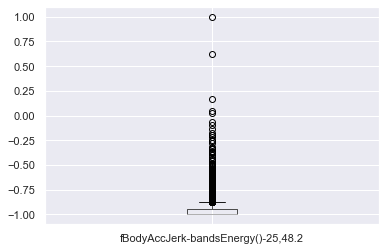

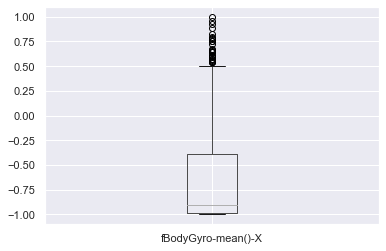

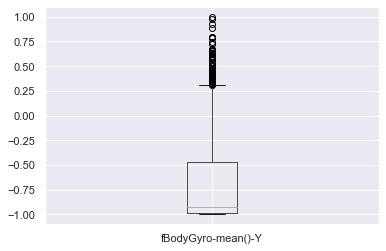

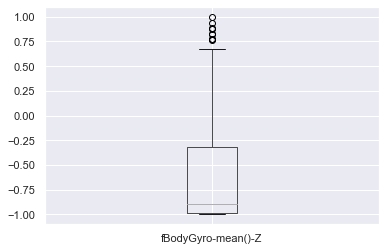

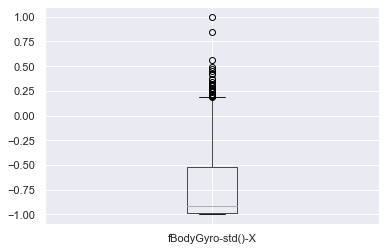

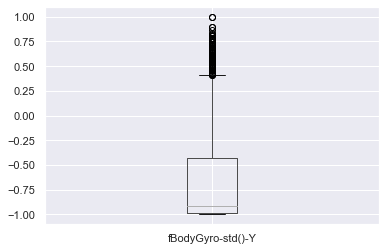

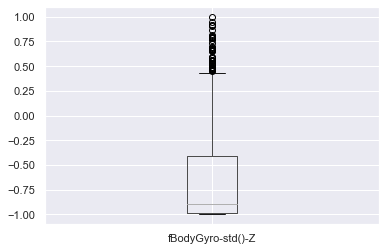

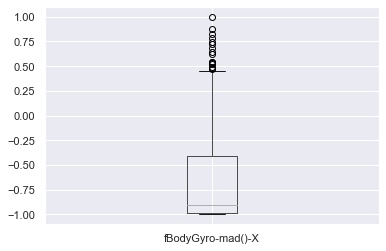

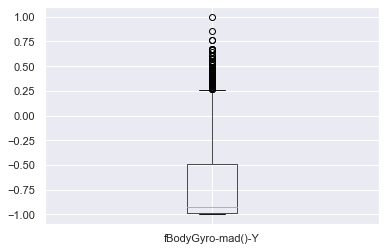

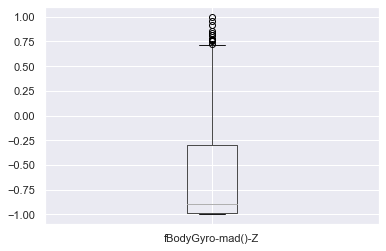

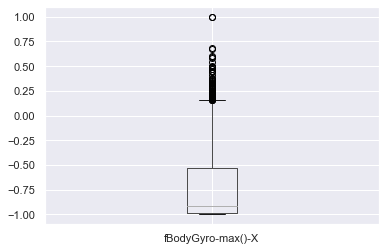

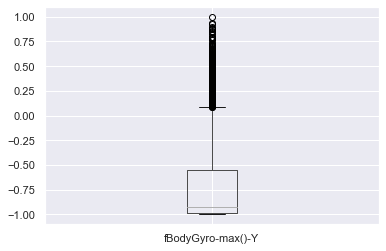

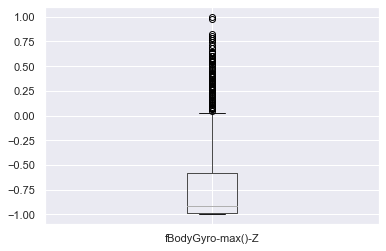

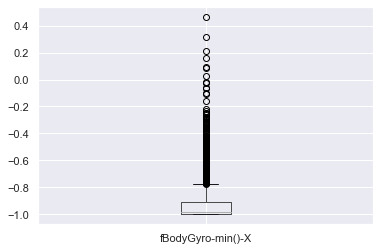

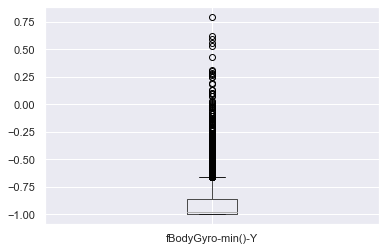

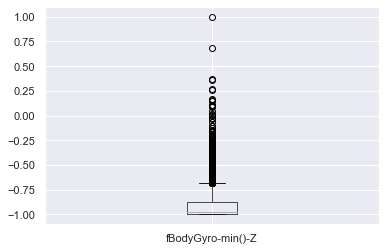

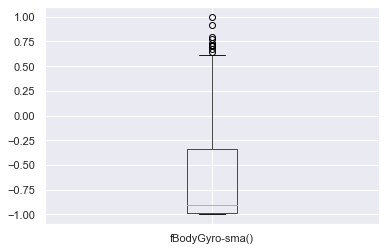

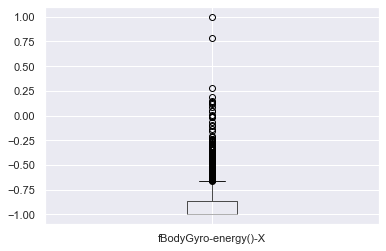

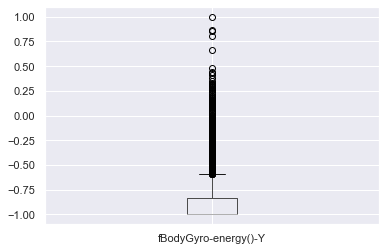

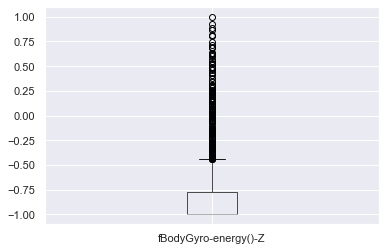

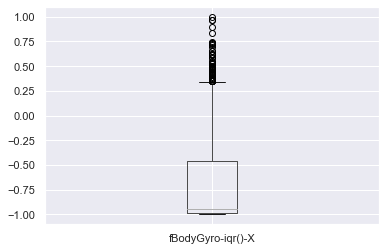

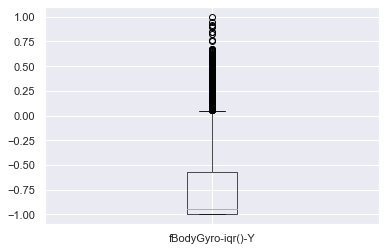

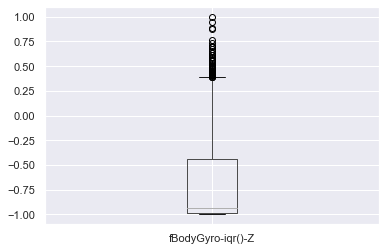

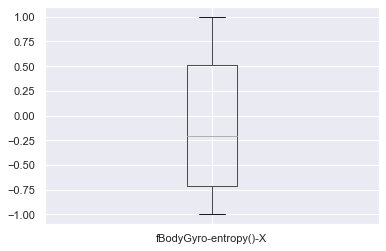

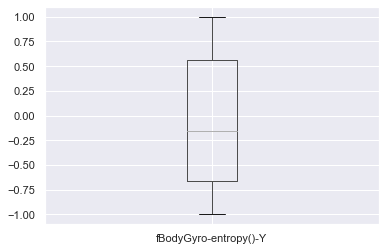

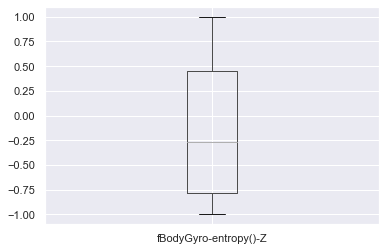

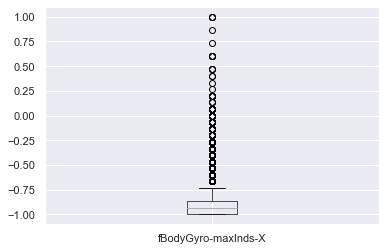

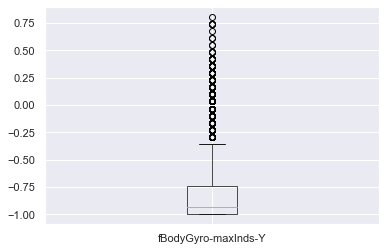

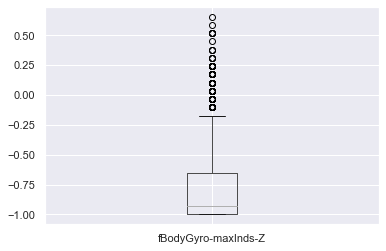

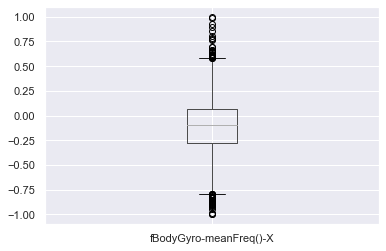

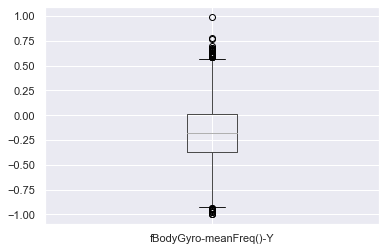

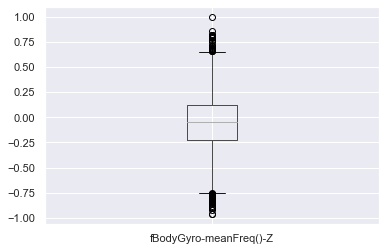

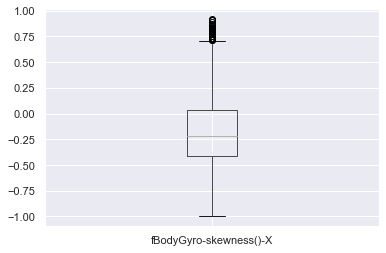

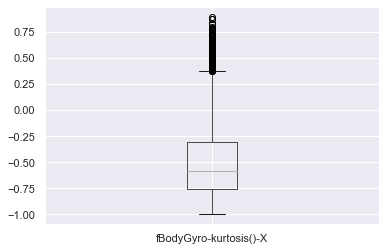

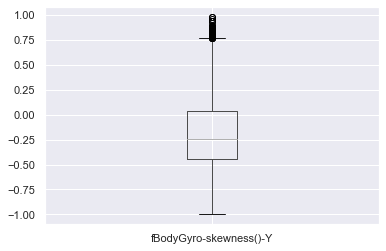

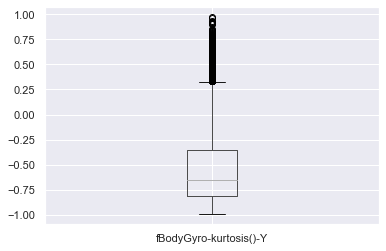

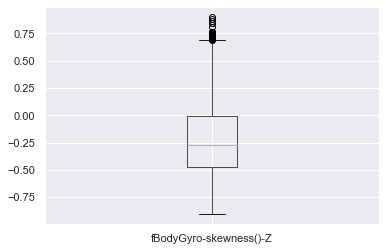

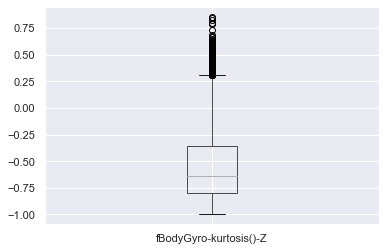

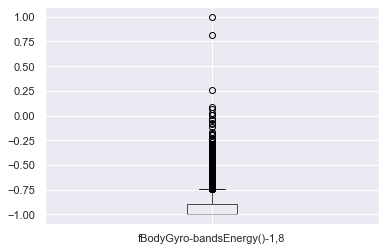

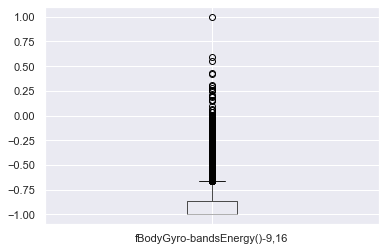

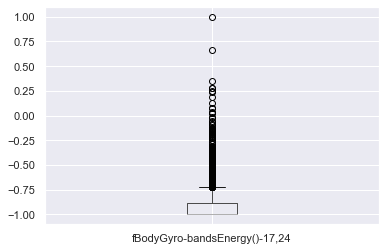

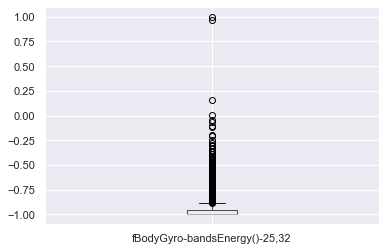

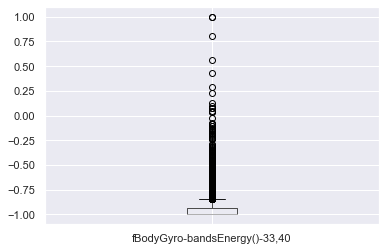

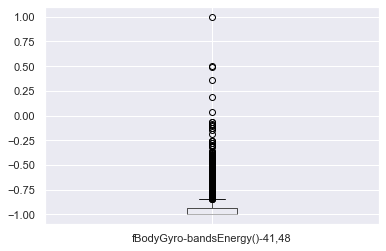

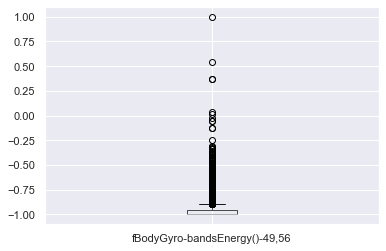

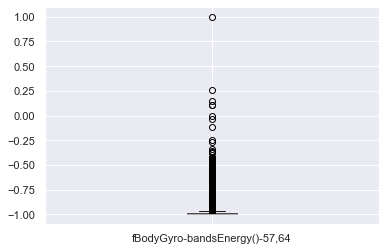

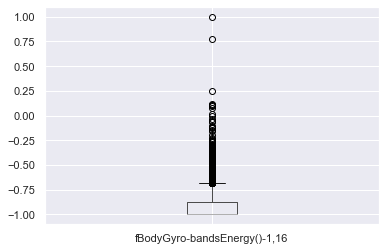

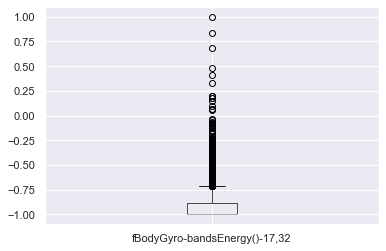

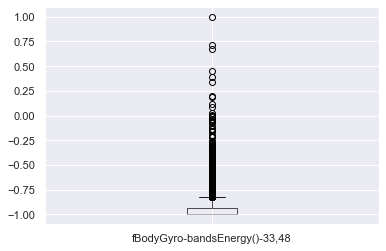

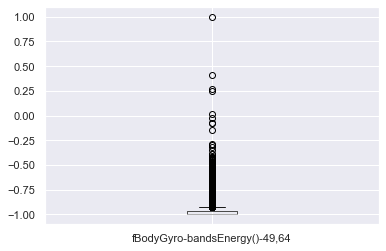

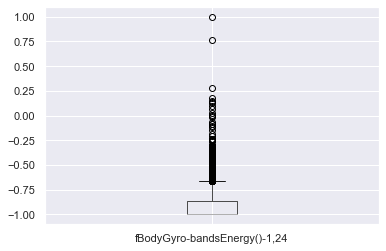

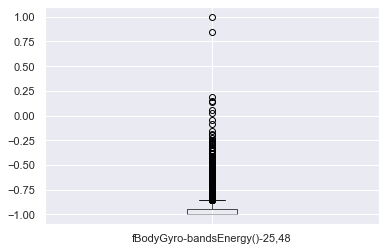

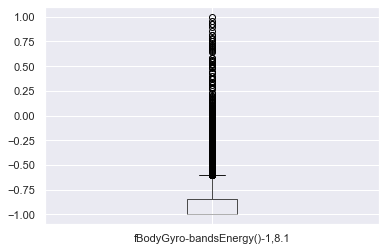

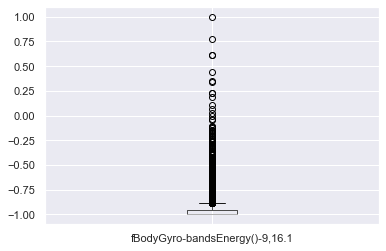

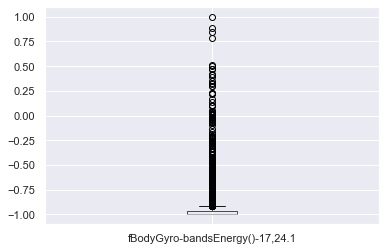

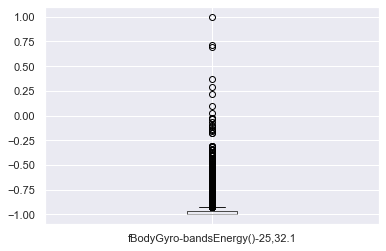

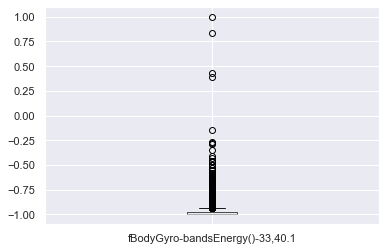

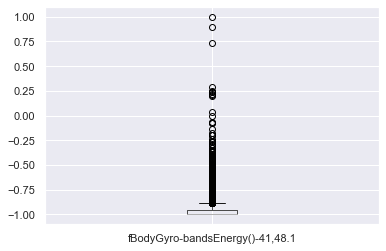

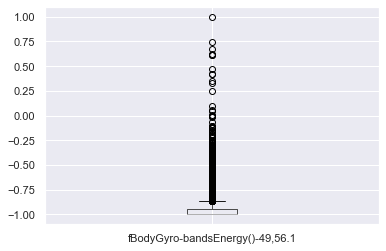

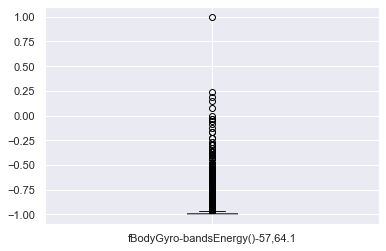

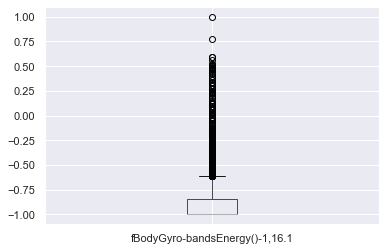

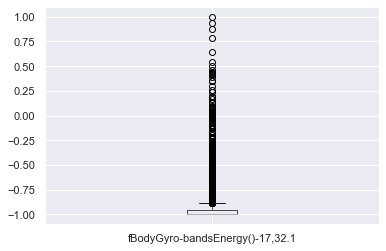

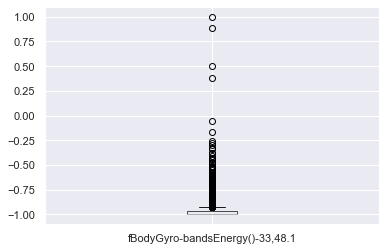

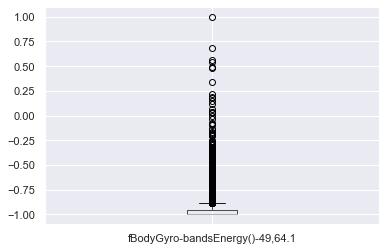

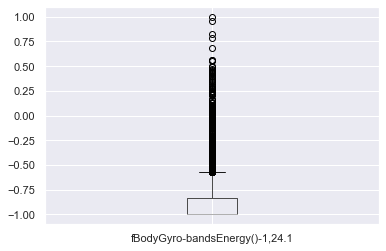

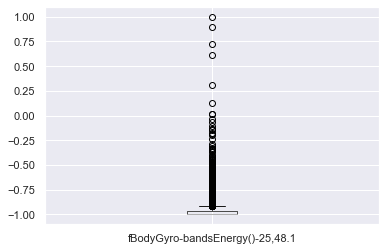

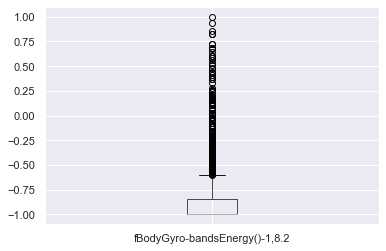

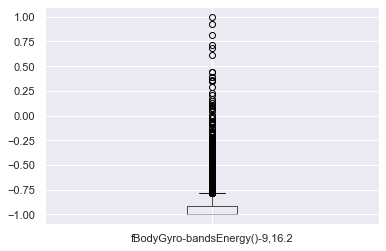

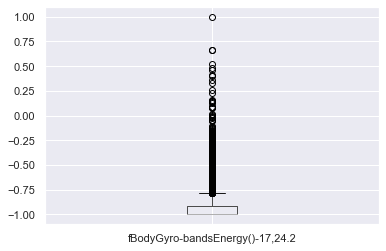

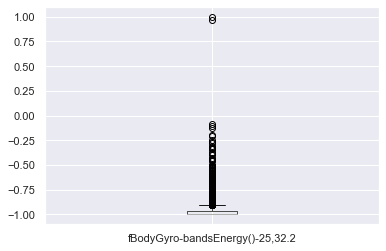

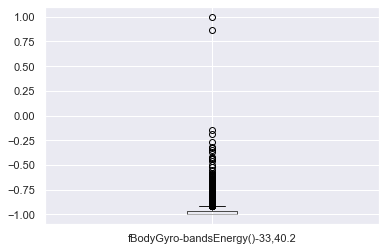

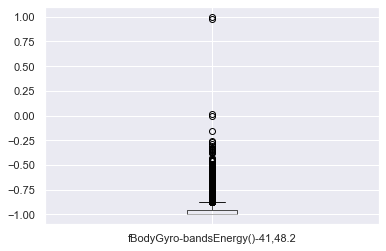

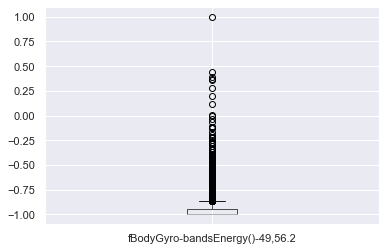

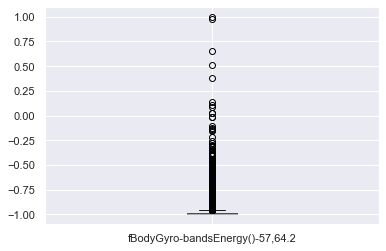

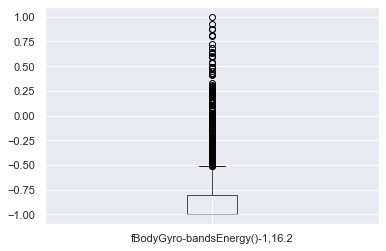

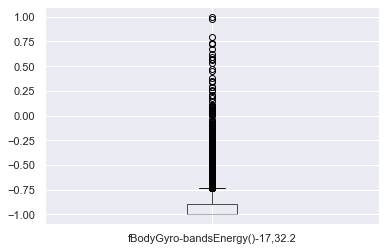

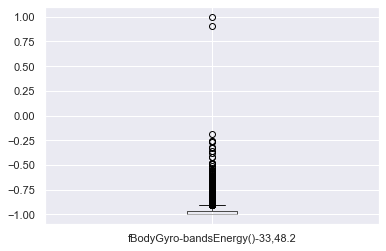

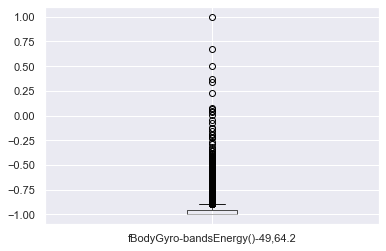

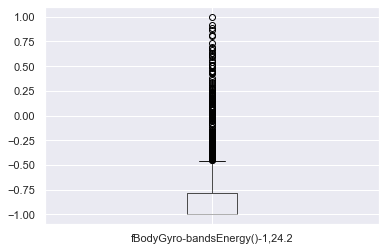

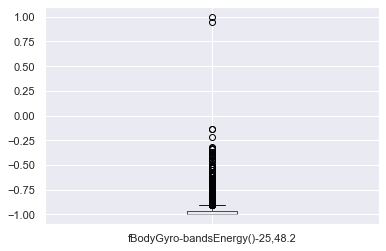

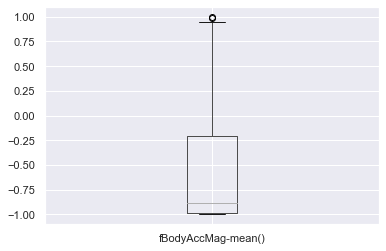

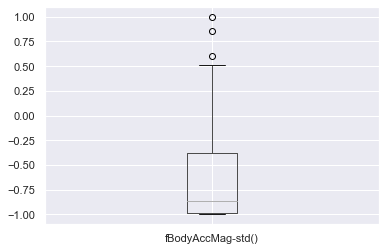

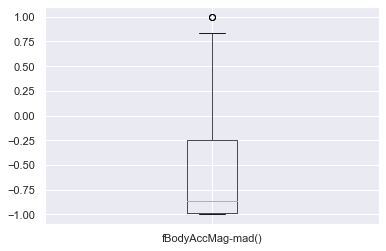

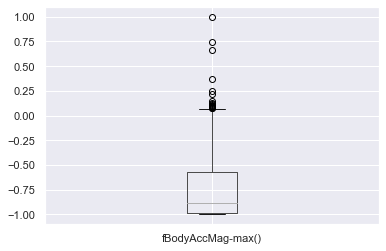

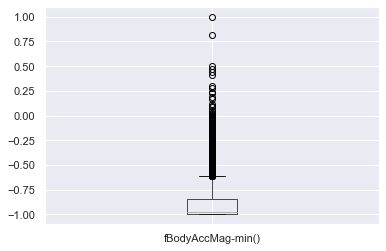

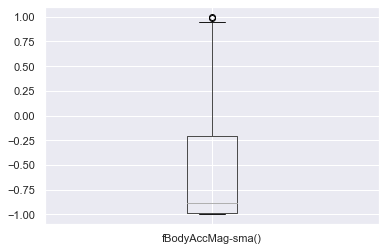

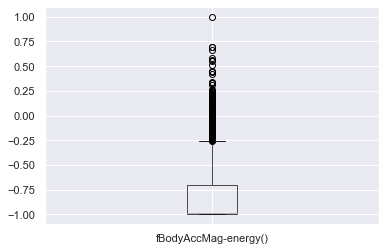

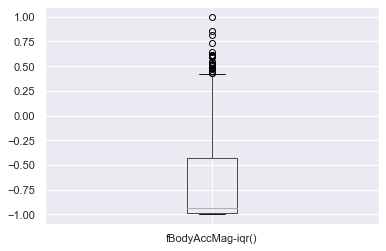

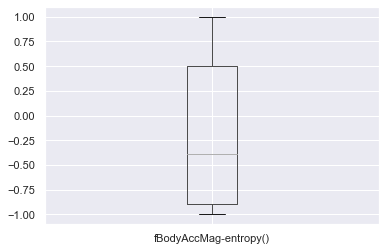

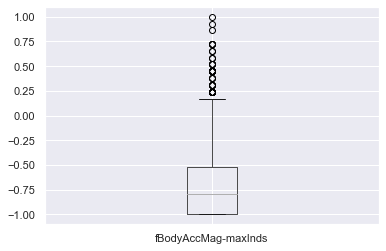

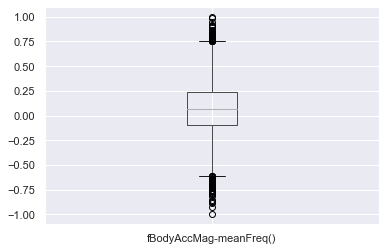

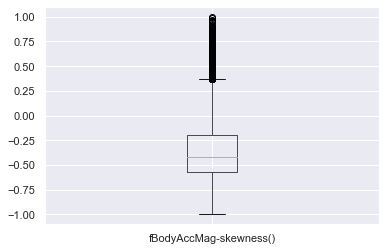

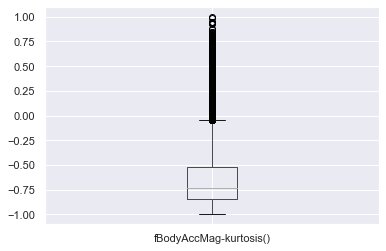

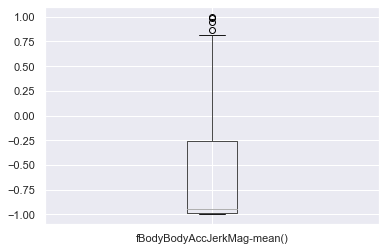

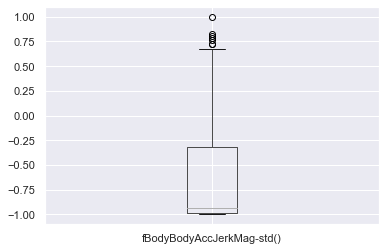

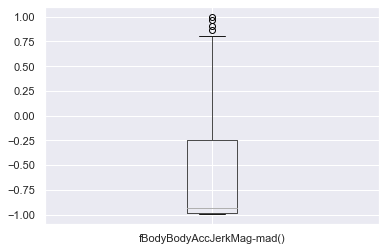

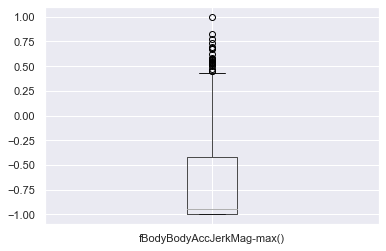

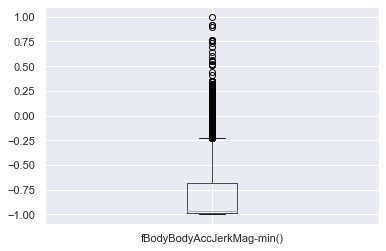

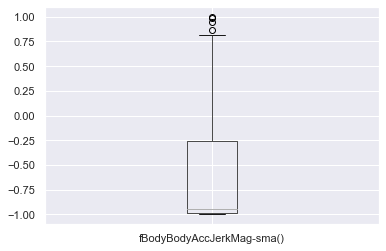

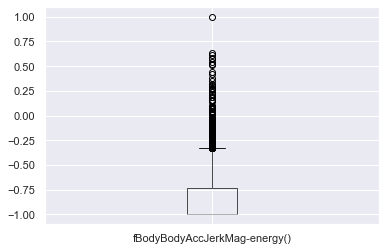

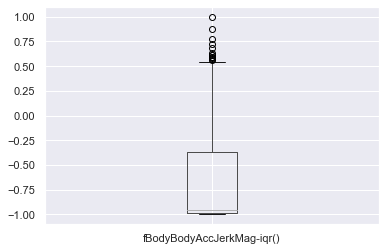

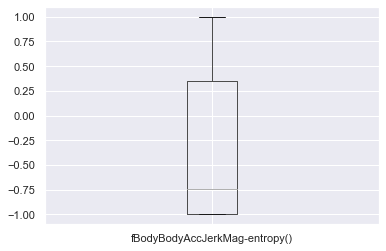

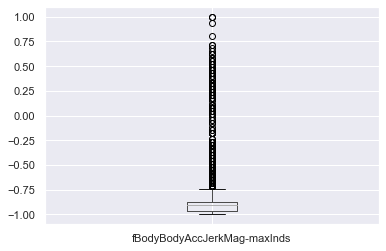

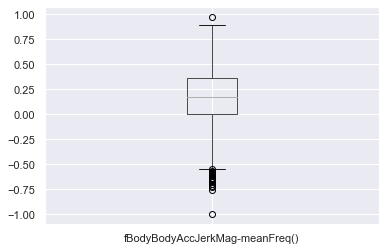

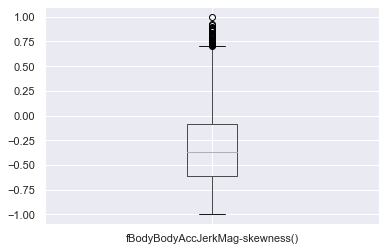

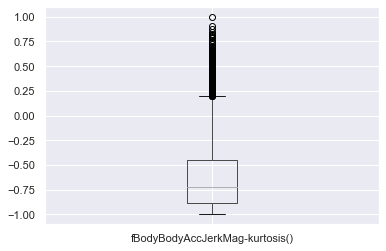

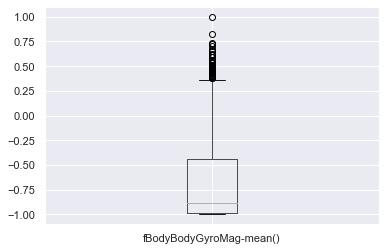

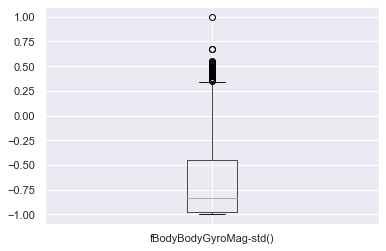

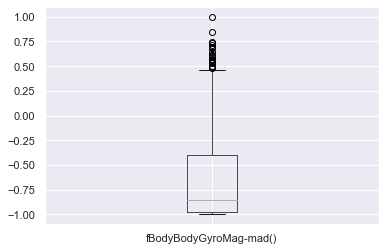

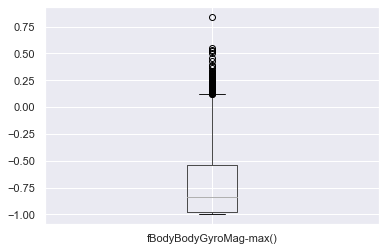

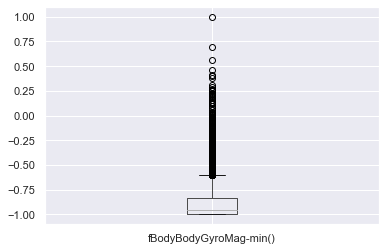

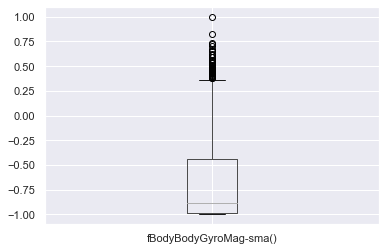

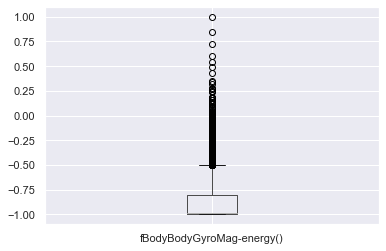

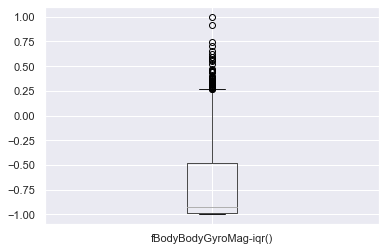

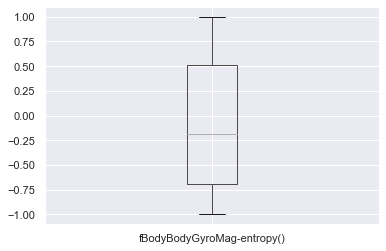

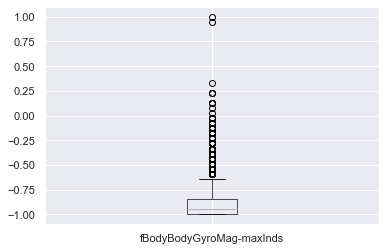

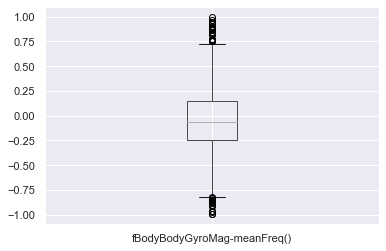

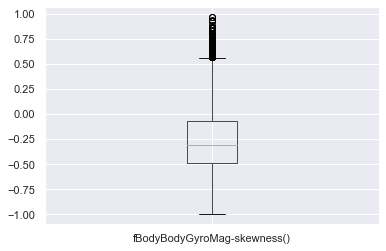

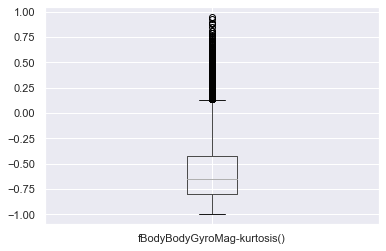

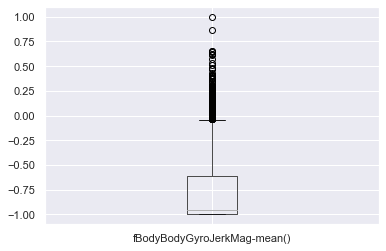

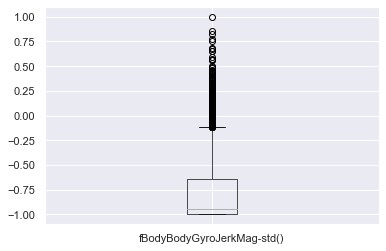

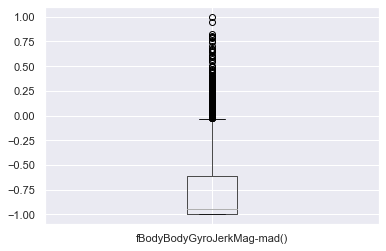

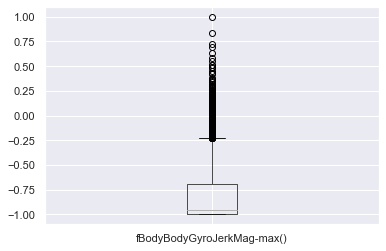

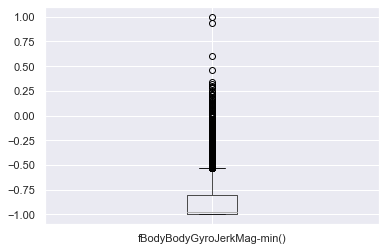

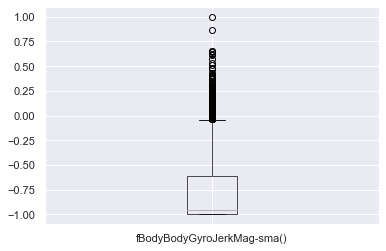

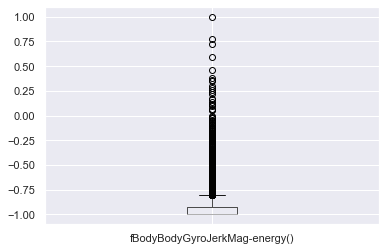

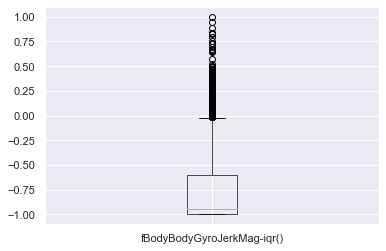

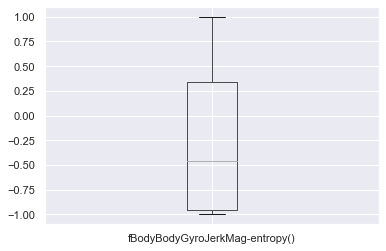

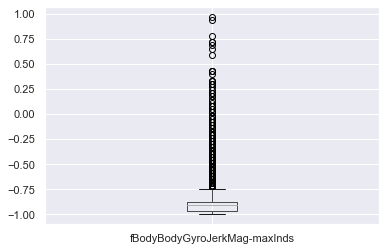

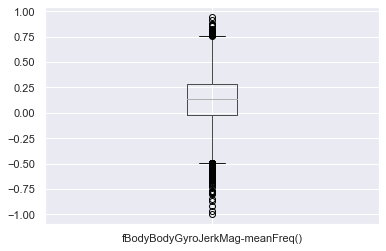

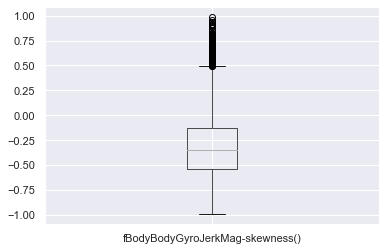

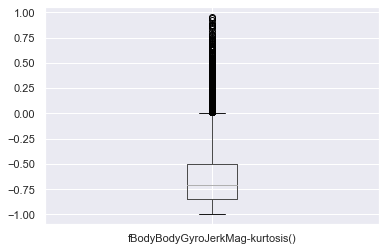

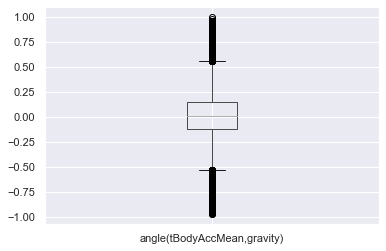

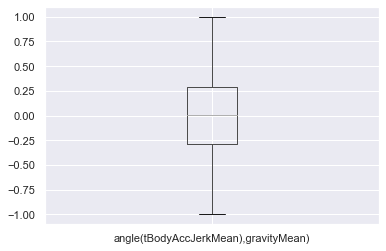

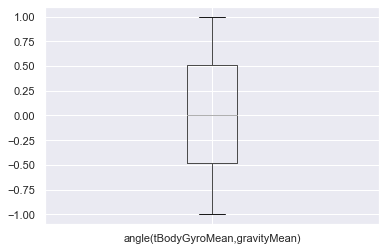

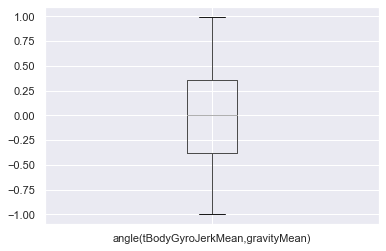

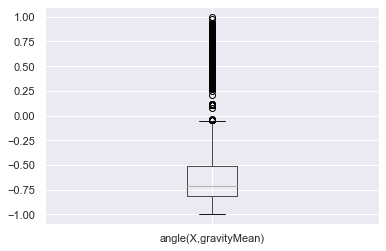

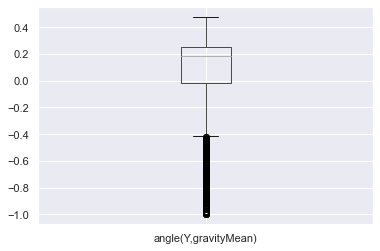

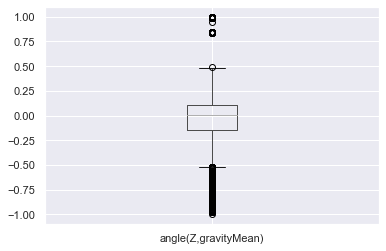

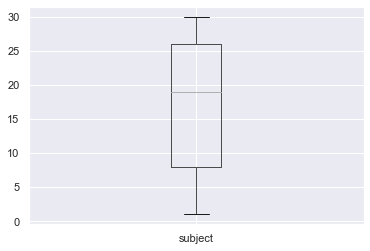

In [33]:


# get numeric data
num_train = df_train.select_dtypes(exclude=['object'])
num_test = df_test.select_dtypes(exclude=['object'])

# draw boxplot for outlier visualization
for column in num_train:
    plt.figure()
    num_train.boxplot([column])

### Handle outliers with SVMs¶
需要handle吗， svm 对噪声很敏感
There are 2 variants of SVMs. They are hard-margin variant of SVM and soft-margin variant of SVM.

The hard-margin variant of SVM does not deal with outliers. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.

Another version of SVM is called soft-margin variant of SVM. In this case, we can have a few points incorrectly classified or classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of C parameter, which controls the outliers. Low C implies we are allowing more outliers and high C implies less outliers.

The message is that since the dataset contains outliers, so the value of C should be high while training the model.

In [34]:
# num_test = df_test.select_dtypes(exclude=['object'])
# # update the cols with their normalized values
# # 需要feature scaling吗 
# df_train[num_train.columns] = scaler.fit_transform(num_train)
# df_test[num_test.columns] = scaler.fit_transform(num_test)

In [35]:
df_train.subject

0        1
1        1
2        1
3        1
4        1
        ..
7347    30
7348    30
7349    30
7350    30
7351    30
Name: subject, Length: 7352, dtype: int64

In [36]:
X_train = pd.DataFrame(df_train.drop(['Activity','subject'],axis=1))
y_train = df_train.Activity
X_test = pd.DataFrame(df_test.drop(['Activity','subject'], axis = 1))
y_test = df_test.Activity
X_train

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245         -0.975300         -0.960322         -0.998807   
2            -0.995380         -0.967187         -0.978944         -0.996520   
3            -0.996091         -0.983403         -0.990675         -0.997099   
4            -0.998139         -0.980817         -0.990482         -0.998321   
...                ...               ...               ...               ...   
7347         -0.195387          0.039905          0.077078         -0.282301   
7348         -0.235309          0.004816          0.059280         -0.322552   
7349         -0.218218         -0.103822          0.274533         -0.304515   
7350         -0.219139         -0.111412          0.268893         -0.310487   
7351         -0.269270         -0.087212          0.177404         -0.377404   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.983185         -0.923527         -0.934724  ...   
1            -0.974914         -0.957686         -0.943068  ...   
2            -0.963668         -0.977469         -0.938692  ...   
3            -0.982750         -0.989302         -0.938692  ...   
4            -0.979672         -0.990441         -0.942469  ...   
...                ...               ...               ...  ...   
7347          0.043616          0.060410          0.210795  ...   
7348         -0.029456          0.080585          0.117440  ...   
7349         -0.098913          0.332584          0.043999  ...   
7350         -0.068200          0.319473          0.101702  ...   
7351         -0.038678          0.229430          0.269013  ...   

      fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
0                           -0.074323                        -0.298676   
1                            0.158075                        -0.595051   
2                            0.414503                        -0.390748   
3                            0.404573                        -0.117290   
4                            0.087753                        -0.351471   
...                               ...                              ...   
7347                        -0.070157                        -0.588433   
7348                         0.165259                        -0.390738   
7349                         0.195034                         0.025145   
7350                         0.013865                         0.063907   
7351                        -0.058402                        -0.387052   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.710304                    -0.112754   
1                           -0.861499                     0.053477   
2                           -0.760104                    -0.118559   
3                           -0.482845                    -0.036788   
4                           -0.699205                     0.123320   
...                               ...                          ...   
7347                        -0.880324                    -0.190437   
7348      

In [37]:
num_cols = X_train._get_numeric_data().columns
num_cols.size

561

## Feature Scaling

In [39]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Run Linear SVM with hypertuning

In [41]:
# import SVC classifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# fit classifier to training set
# parameters = {'C':np.arange(1,100,5)}
parameters = {'C':[0.01,0.1,1,10,100]}
lr_svm = LinearSVC()
grid = GridSearchCV(lr_svm,parameters,refit=True,verbose=2)
grid.fit(X_train_scaled, y_train)
y_pred = grid.predict(X_test_scaled)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................................... C=0.01, total=   4.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV] ........................................... C=0.01, total=   4.2s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   3.7s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   4.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   5.8s
[CV] C=0.1 ...........................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................ C=0.1, total=   5.8s
[CV] C=0.1 ...........................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................ C=0.1, total=   6.0s
[CV] C=0.1 ...........................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................ C=0.1, total=   6.3s
[CV] C=0.1 ...........................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................ C=0.1, total=   5.1s
[CV] C=0.1 ...........................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................ C=0.1, total=   5.9s
[CV] C=1 .............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................................. C=1, total=   5.2s
[CV] C=1 .............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................................. C=1, total=   4.5s
[CV] C=1 .............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................................. C=1, total=   4.8s
[CV] C=1 .............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................................. C=1, total=   5.9s
[CV] C=1 .............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .............................................. C=1, total=   4.8s
[CV] C=10 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=10, total=   4.8s
[CV] C=10 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=10, total=   5.3s
[CV] C=10 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=10, total=   4.6s
[CV] C=10 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=10, total=   5.3s
[CV] C=10 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=10, total=   4.8s
[CV] C=100 ...........................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................ C=100, total=   4.2s
[CV] C=100 ...........................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................ C=100, total=   4.4s
[CV] C=100 ...........................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................ C=100, total=   4.4s
[CV] C=100 ...........................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................ C=100, total=   5.0s
[CV] C=100 ...........................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.1min finished


[CV] ............................................ C=100, total=   4.7s
Model accuracy score with default hyperparameters: 0.9620


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [43]:
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)


 The best estimator across ALL searched params:
 LinearSVC(C=0.1)


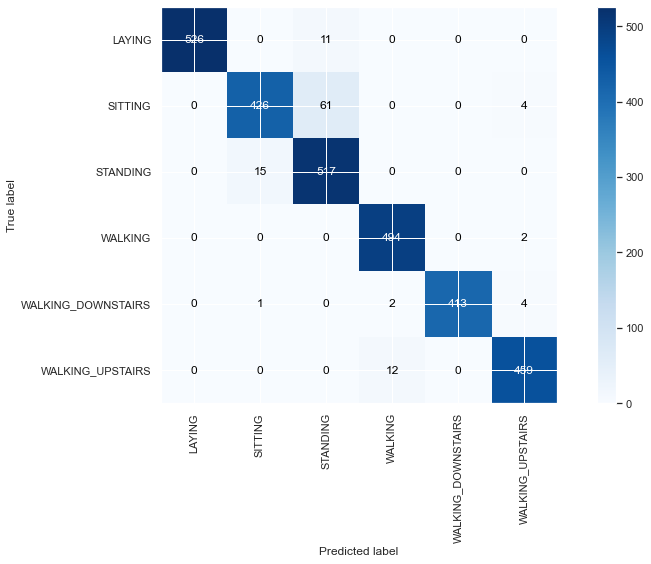

In [42]:
# plotting confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test.values, y_pred)

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(cm, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=np.unique(y_pred),
    yticklabels=np.unique(y_pred),
    ylabel="True label",
    xlabel="Predicted label",
)
plt.xticks(rotation = 90)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

## Run linear SVM with MAIN FEATURES (including hypertuning)

In [20]:
# from eda, only use following features to fit the model

### Removing commas, brackets and dashes
columns = X_train.columns
columns = columns.str.replace('[()]','', regex=True)
columns = columns.str.replace('[-]', '', regex=True)
columns = columns.str.replace('[,]','', regex=True)
X_train.columns = columns
X_test.columns = columns

X_train_selected = pd.DataFrame(X_train[["tBodyAccMagmean", "tGravityAccMagmean", "tBodyAccJerkMagmean",
"tBodyGyroMagmean", "tBodyGyroJerkMagmean", "fBodyAccMagmean", "fBodyBodyAccJerkMagmean",
"fBodyBodyGyroMagmean","fBodyBodyGyroJerkMagmean"]])

X_test_selected = pd.DataFrame(X_test[["tBodyAccMagmean", "tGravityAccMagmean", "tBodyAccJerkMagmean",
"tBodyGyroMagmean", "tBodyGyroJerkMagmean", "fBodyAccMagmean", "fBodyBodyAccJerkMagmean",
"fBodyBodyGyroMagmean","fBodyBodyGyroJerkMagmean"]])

# scaling data:

X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.fit_transform(X_test_selected)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] C=11 ............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ............................................. C=11, total=   0.9s
[CV] C=11 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=11, total=   1.0s
[CV] C=11 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=11, total=   1.0s
[CV] C=11 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=11, total=   0.9s
[CV] C=11 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=11, total=   0.9s
[CV] C=16 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=16, total=   0.9s
[CV] C=16 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=16, total=   1.0s
[CV] C=16 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=16, total=   1.0s
[CV] C=16 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=16, total=   0.9s
[CV] C=16 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=16, total=   1.0s
[CV] C=21 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=21, total=   1.0s
[CV] C=21 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=21, total=   1.0s
[CV] C=21 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=21, total=   1.1s
[CV] C=21 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=21, total=   1.0s
[CV] C=21 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=21, total=   1.0s
[CV] C=26 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=26, total=   1.0s
[CV] C=26 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=26, total=   1.0s
[CV] C=26 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=26, total=   1.1s
[CV] C=26 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=26, total=   1.0s
[CV] C=26 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=26, total=   1.0s
[CV] C=31 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=31, total=   1.1s
[CV] C=31 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=31, total=   1.1s
[CV] C=31 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=31, total=   1.1s
[CV] C=31 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=31, total=   1.0s
[CV] C=31 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=31, total=   1.1s
[CV] C=36 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=36, total=   1.0s
[CV] C=36 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=36, total=   1.0s
[CV] C=36 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=36, total=   1.1s
[CV] C=36 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=36, total=   1.0s
[CV] C=36 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=36, total=   1.1s
[CV] C=41 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=41, total=   1.0s
[CV] C=41 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=41, total=   1.1s
[CV] C=41 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=41, total=   1.1s
[CV] C=41 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=41, total=   1.0s
[CV] C=41 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=41, total=   1.1s
[CV] C=46 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=46, total=   1.1s
[CV] C=46 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=46, total=   1.0s
[CV] C=46 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=46, total=   1.1s
[CV] C=46 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=46, total=   1.0s
[CV] C=46 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=46, total=   1.1s
[CV] C=51 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=51, total=   1.1s
[CV] C=51 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=51, total=   1.1s
[CV] C=51 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=51, total=   1.1s
[CV] C=51 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=51, total=   1.0s
[CV] C=51 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=51, total=   1.1s
[CV] C=56 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=56, total=   1.0s
[CV] C=56 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=56, total=   1.1s
[CV] C=56 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=56, total=   1.1s
[CV] C=56 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=56, total=   1.0s
[CV] C=56 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=56, total=   1.1s
[CV] C=61 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=61, total=   1.1s
[CV] C=61 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=61, total=   1.1s
[CV] C=61 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=61, total=   1.1s
[CV] C=61 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=61, total=   1.0s
[CV] C=61 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=61, total=   1.1s
[CV] C=66 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=66, total=   1.1s
[CV] C=66 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=66, total=   1.1s
[CV] C=66 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=66, total=   1.1s
[CV] C=66 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=66, total=   1.0s
[CV] C=66 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=66, total=   1.1s
[CV] C=71 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=71, total=   1.1s
[CV] C=71 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=71, total=   1.1s
[CV] C=71 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=71, total=   1.1s
[CV] C=71 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=71, total=   1.0s
[CV] C=71 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=71, total=   1.1s
[CV] C=76 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=76, total=   1.1s
[CV] C=76 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=76, total=   1.1s
[CV] C=76 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=76, total=   1.1s
[CV] C=76 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=76, total=   1.0s
[CV] C=76 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=76, total=   1.1s
[CV] C=81 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=81, total=   1.2s
[CV] C=81 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=81, total=   1.1s
[CV] C=81 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=81, total=   1.1s
[CV] C=81 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=81, total=   1.1s
[CV] C=81 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=81, total=   1.2s
[CV] C=86 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=86, total=   1.2s
[CV] C=86 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=86, total=   1.2s
[CV] C=86 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=86, total=   1.5s
[CV] C=86 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=86, total=   1.2s
[CV] C=86 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=86, total=   1.3s
[CV] C=91 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=91, total=   1.2s
[CV] C=91 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=91, total=   1.1s
[CV] C=91 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=91, total=   1.1s
[CV] C=91 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=91, total=   1.1s
[CV] C=91 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=91, total=   1.2s
[CV] C=96 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=96, total=   1.2s
[CV] C=96 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=96, total=   1.1s
[CV] C=96 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=96, total=   1.4s
[CV] C=96 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................................. C=96, total=   1.6s
[CV] C=96 ............................................................


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.6min finished


[CV] ............................................. C=96, total=   1.3s
Model accuracy score with default hyperparameters: 0.6630


D:\.anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
#import linear svc classifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
linearSVC = LinearSVC()
# fit classifier to training set
parameters = {'C':np.arange(1,100,5)}
lr_svm = LinearSVC()
grid = GridSearchCV(lr_svm,parameters,refit=True,verbose=2)
grid.fit(X_train_selected_scaled, y_train)
y_pred_linear = grid.predict(X_test_selected_scaled)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


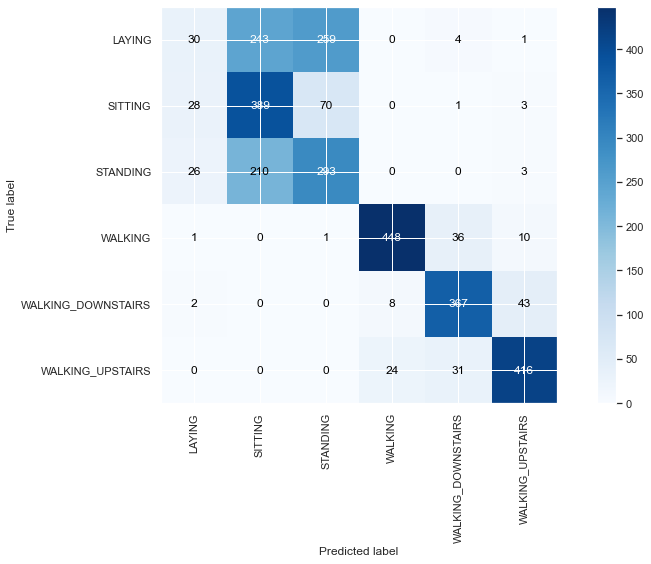

In [21]:
# plotting confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test.values, y_pred_linear)

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(cm, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=np.unique(y_pred_linear),
    yticklabels=np.unique(y_pred_linear),
    ylabel="True label",
    xlabel="Predicted label",
)
plt.xticks(rotation = 90)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

In [13]:
## why fitting 5 folds???
# best kernel
# getting best random search attributes
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)


 The best estimator across ALL searched params:
 LinearSVC(C=21)


## Run kernel SVC with MAIN FEATURES (including hypertuning of c and different kernel)

In [24]:
# linear svc does not have good performance when using only the main features so we take look at kernel svc

parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}  ##c 的 选择
grid_kernel = GridSearchCV(SVC(),parameters, refit = True, verbose = 2)
grid_kernel.fit(X_train_selected_scaled,y_train)
y_pred_kernel = grid_kernel.predict(X_test_selected_scaled)


# compute and print accuracy score
print('Model accuracy score with hypertuning hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_kernel)))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.8s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.6s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   1.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   1.9s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] .

[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.9s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.8s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   1.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.7s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.7s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.8s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.7s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.7s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.7s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.7s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.7s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.7s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.7s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.7s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[CV] .................. C=100, gamma=0.001, kernel=poly, total=   1.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   1.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.6s


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 12.8min finished


Model accuracy score with hypertuning hyperparameters: 0.6630


In [27]:

# compute and print accuracy score
print('Model accuracy score with hypertuning hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_kernel)))

Model accuracy score with hypertuning hyperparameters: 0.6637


In [25]:
## poly kernel  with high c is very slow

# getting best random search attributes
print("\n The best estimator across ALL searched params:\n",grid_kernel.best_estimator_)


 The best estimator across ALL searched params:
 SVC(C=10, gamma=1, kernel='poly')



 The best estimator across ALL searched params:
 SVC(C=10, gamma=1, kernel='poly')


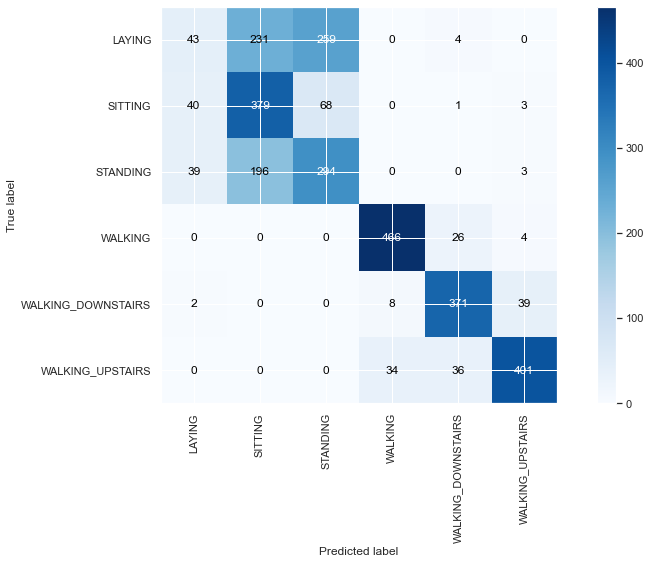

In [26]:
# getting best random search attributes
print("\n The best estimator across ALL searched params:\n",grid_kernel.best_estimator_)
cm = confusion_matrix(y_test.values, y_pred)

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(cm, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=np.unique(y_pred),
    yticklabels=np.unique(y_pred),
    ylabel="True label",
    xlabel="Predicted label",
)
plt.xticks(rotation = 90)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()